In [434]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score, confusion_matrix
from sklearn.impute import KNNImputer
import numpy as np

world_data = pd.read_csv("world_data.csv")
top_languages = pd.read_csv("top_languages.csv")

In [435]:
# https://stackoverflow.com/questions/19124601/pretty-print-an-entire-pandas-series-dataframe
with pd.option_context('display.max_rows', None, 'display.max_columns', None):      
    display(world_data.head())

,Country,Density\n(P/Km2),Abbreviation,Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Calling Code,Capital/Major City,Co2-Emissions,CPI,CPI Change (%),Currency-Code,Fertility Rate,Forested Area (%),Gasoline Price,GDP,Gross primary education enrollment (%),Gross tertiary education enrollment (%),Infant mortality,Largest city,Life expectancy,Maternal mortality ratio,Minimum wage,Official language,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population,Latitude,Longitude
0,Afghanistan,60,AF,58.10%,"652,230","323,000",32.49,93.0,Kabul,"8,672",149.9,2.30%,AFN,4.47,2.10%,$0.70,"$19,101,353,833",104.00%,9.70%,47.9,Kabul,64.5,638.0,$0.43,Pashto,78.40%,0.28,"38,041,754",48.90%,9.30%,71.40%,11.12%,"9,797,273",33.939110,67.709953
1,Albania,105,AL,43.10%,"28,748","9,000",11.78,355.0,Tirana,"4,536",119.05,1.40%,ALL,1.62,28.10%,$1.36,"$15,278,077,447",107.00%,55.00%,7.8,Tirana,78.5,15.0,$1.12,Albanian,56.90%,1.20,"2,854,191",55.70%,18.60%,36.60%,12.33%,"1,747,593",41.153332,20.168331
2,Algeria,18,DZ,17.40%,"2,381,741","317,000",24.28,213.0,Algiers,"150,006",151.36,2.00%,DZD,3.02,0.80%,$0.28,"$169,988,236,398",109.90%,51.40%,20.1,Algiers,76.7,112.0,$0.95,Arabic,28.10%,1.72,"43,053,054",41.20%,37.20%,66.10%,11.70%,"31,510,100",28.033886,1.659626
3,Andorra,164,AD,40.00%,468,NaN,7.20,376.0,Andorra la Vella,469,NaN,NaN,EUR,1.27,34.00%,$1.51,"$3,154,057,987",106.40%,NaN,2.7,Andorra la Vella,NaN,NaN,$6.63,Catalan,36.40%,3.33,"77,142",NaN,NaN,NaN,NaN,"67,873",42.506285,1.521801
4,Angola,26,AO,47.50%,"1,246,700","117,000",40.73,244.0,Luanda,"34,693",261.73,17.10%,AOA,5.52,46.30%,$0.97,"$94,635,415,870",113.50%,9.30%,51.6,Luanda,60.8,241.0,$0.71,Portuguese,33.40%,0.21,"31,825,295",77.50%,9.20%,49.10%,6.89%,"21,061,025",-11.202692,17.873887


In [436]:
# Removing Unwanted Columns
world_data.drop(['Abbreviation'], axis=1, inplace=True)
world_data.drop(['Calling Code'], axis=1, inplace=True)
world_data.drop(['Capital/Major City'], axis=1, inplace=True)
world_data.drop(['Currency-Code'], axis=1, inplace=True)
world_data.drop(['Latitude'], axis=1, inplace=True)
world_data.drop(['Longitude'], axis=1, inplace=True)
world_data.drop(['Armed Forces size'], axis=1, inplace=True)
world_data.drop(['Largest city'], axis=1, inplace=True)

# world_data.drop(['Land Area(Km2)'], axis=1, inplace=True)
# world_data.drop(['Birth Rate'], axis=1, inplace=True)

In [437]:
# Dataset after removing all unwanted columns
with pd.option_context('display.max_rows', None, 'display.max_columns', None):      
    display(world_data.head())

,Country,Density\n(P/Km2),Agricultural Land( %),Land Area(Km2),Birth Rate,Co2-Emissions,CPI,CPI Change (%),Fertility Rate,Forested Area (%),Gasoline Price,GDP,Gross primary education enrollment (%),Gross tertiary education enrollment (%),Infant mortality,Life expectancy,Maternal mortality ratio,Minimum wage,Official language,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population
0,Afghanistan,60,58.10%,"652,230",32.49,"8,672",149.9,2.30%,4.47,2.10%,$0.70,"$19,101,353,833",104.00%,9.70%,47.9,64.5,638.0,$0.43,Pashto,78.40%,0.28,"38,041,754",48.90%,9.30%,71.40%,11.12%,"9,797,273"
1,Albania,105,43.10%,"28,748",11.78,"4,536",119.05,1.40%,1.62,28.10%,$1.36,"$15,278,077,447",107.00%,55.00%,7.8,78.5,15.0,$1.12,Albanian,56.90%,1.20,"2,854,191",55.70%,18.60%,36.60%,12.33%,"1,747,593"
2,Algeria,18,17.40%,"2,381,741",24.28,"150,006",151.36,2.00%,3.02,0.80%,$0.28,"$169,988,236,398",109.90%,51.40%,20.1,76.7,112.0,$0.95,Arabic,28.10%,1.72,"43,053,054",41.20%,37.20%,66.10%,11.70%,"31,510,100"
3,Andorra,164,40.00%,468,7.20,469,NaN,NaN,1.27,34.00%,$1.51,"$3,154,057,987",106.40%,NaN,2.7,NaN,NaN,$6.63,Catalan,36.40%,3.33,"77,142",NaN,NaN,NaN,NaN,"67,873"
4,Angola,26,47.50%,"1,246,700",40.73,"34,693",261.73,17.10%,5.52,46.30%,$0.97,"$94,635,415,870",113.50%,9.30%,51.6,60.8,241.0,$0.71,Portuguese,33.40%,0.21,"31,825,295",77.50%,9.20%,49.10%,6.89%,"21,061,025"


In [438]:
# Checking data type of each column
for column_name, data_type in world_data.dtypes.items():
    print(f"Column: {column_name}, Data Type: {data_type}")

Column: Country, Data Type: object
Column: Density
(P/Km2), Data Type: object
Column: Agricultural Land( %), Data Type: object
Column: Land Area(Km2), Data Type: object
Column: Birth Rate, Data Type: float64
Column: Co2-Emissions, Data Type: object
Column: CPI, Data Type: object
Column: CPI Change (%), Data Type: object
Column: Fertility Rate, Data Type: float64
Column: Forested Area (%), Data Type: object
Column: Gasoline Price, Data Type: object
Column: GDP, Data Type: object
Column: Gross primary education enrollment (%), Data Type: object
Column: Gross tertiary education enrollment (%), Data Type: object
Column: Infant mortality, Data Type: float64
Column: Life expectancy, Data Type: float64
Column: Maternal mortality ratio, Data Type: float64
Column: Minimum wage, Data Type: object
Column: Official language, Data Type: object
Column: Out of pocket health expenditure, Data Type: object
Column: Physicians per thousand, Data Type: float64
Column: Population, Data Type: object
Column:

In [439]:
# Converting strings to integers and floats
def replace_commas(x):
    return x.replace(',', '') if isinstance(x, str) else x

def replace_percentage(x):
    return x.replace('%', '') if isinstance(x, str) else x

def replace_dollar(x):
    return x.replace('$', '') if isinstance(x, str) else x

def round_down(x):
    return x * 0.01

world_data['Density\n(P/Km2)'] = world_data['Density\n(P/Km2)'].apply(replace_commas).astype(float)
world_data['Agricultural Land( %)'] = world_data['Agricultural Land( %)'].apply(replace_percentage).astype(float).apply(round_down)
world_data['Land Area(Km2)'] = world_data['Land Area(Km2)'].apply(replace_commas).astype(float)
world_data['Co2-Emissions'] = world_data['Co2-Emissions'].apply(replace_commas).astype(float)
world_data['CPI'] = world_data['CPI'].apply(replace_commas).astype(float)
world_data['CPI Change (%)'] = world_data['CPI Change (%)'].apply(replace_percentage).astype(float).apply(round_down)
world_data['Forested Area (%)'] = world_data['Forested Area (%)'].apply(replace_percentage).astype(float).apply(round_down)
world_data['Gasoline Price'] = world_data['Gasoline Price'].apply(replace_dollar).astype(float)
world_data['GDP'] = world_data['GDP'].apply(replace_dollar).apply(replace_commas).astype(float)
world_data['Gross primary education enrollment (%)'] = world_data['Gross primary education enrollment (%)'].apply(replace_percentage).astype(float).apply(round_down)
world_data['Gross tertiary education enrollment (%)'] = world_data['Gross tertiary education enrollment (%)'].apply(replace_percentage).astype(float).apply(round_down)
world_data['Minimum wage'] = world_data['Minimum wage'].apply(replace_dollar).astype(float)
world_data['Out of pocket health expenditure'] = world_data['Out of pocket health expenditure'].apply(replace_percentage).astype(float).apply(round_down)
world_data['Population'] = world_data['Population'].apply(replace_commas).astype(float)
world_data['Population: Labor force participation (%)'] = world_data['Population: Labor force participation (%)'].apply(replace_percentage).astype(float).apply(round_down)
world_data['Tax revenue (%)'] = world_data['Tax revenue (%)'].apply(replace_percentage).astype(float).apply(round_down)
world_data['Total tax rate'] = world_data['Total tax rate'].apply(replace_percentage).astype(float).apply(round_down)
world_data['Unemployment rate'] = world_data['Unemployment rate'].apply(replace_percentage).astype(float).apply(round_down)
world_data['Urban_population'] = world_data['Urban_population'].apply(replace_commas).astype(float)

with pd.option_context('display.max_rows', None, 'display.max_columns', None):      
    display(world_data.head())

,Country,Density\n(P/Km2),Agricultural Land( %),Land Area(Km2),Birth Rate,Co2-Emissions,CPI,CPI Change (%),Fertility Rate,Forested Area (%),Gasoline Price,GDP,Gross primary education enrollment (%),Gross tertiary education enrollment (%),Infant mortality,Life expectancy,Maternal mortality ratio,Minimum wage,Official language,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population
0,Afghanistan,60.0,0.581,652230.0,32.49,8672.0,149.90,0.023,4.47,0.021,0.70,1.910135e+10,1.040,0.097,47.9,64.5,638.0,0.43,Pashto,0.784,0.28,38041754.0,0.489,0.093,0.714,0.1112,9797273.0
1,Albania,105.0,0.431,28748.0,11.78,4536.0,119.05,0.014,1.62,0.281,1.36,1.527808e+10,1.070,0.550,7.8,78.5,15.0,1.12,Albanian,0.569,1.20,2854191.0,0.557,0.186,0.366,0.1233,1747593.0
2,Algeria,18.0,0.174,2381741.0,24.28,150006.0,151.36,0.020,3.02,0.008,0.28,1.699882e+11,1.099,0.514,20.1,76.7,112.0,0.95,Arabic,0.281,1.72,43053054.0,0.412,0.372,0.661,0.1170,31510100.0
3,Andorra,164.0,0.400,468.0,7.20,469.0,NaN,NaN,1.27,0.340,1.51,3.154058e+09,1.064,NaN,2.7,NaN,NaN,6.63,Catalan,0.364,3.33,77142.0,NaN,NaN,NaN,NaN,67873.0
4,Angola,26.0,0.475,1246700.0,40.73,34693.0,261.73,0.171,5.52,0.463,0.97,9.463542e+10,1.135,0.093,51.6,60.8,241.0,0.71,Portuguese,0.334,0.21,31825295.0,0.775,0.092,0.491,0.0689,21061025.0


In [440]:
threshold = 9

while threshold >= 2:
    rows_with_missing_values = world_data[world_data.isnull().any(axis=1)]
    missing_values_per_row = rows_with_missing_values.isnull().sum(axis=1)
    rows_with_several_missing_values = rows_with_missing_values[missing_values_per_row >= threshold]
    world_data = world_data.drop(rows_with_several_missing_values.index)
    threshold = threshold - 1

print(len(world_data))

162


In [441]:
null_counts = world_data.isnull().sum()
columns_with_null = null_counts[null_counts > 0]
print(columns_with_null)

CPI                                         1
Gasoline Price                              3
Gross primary education enrollment (%)      1
Gross tertiary education enrollment (%)     1
Minimum wage                               25
Official language                           4
Tax revenue (%)                             9
dtype: int64


In [442]:
# Substitute values for missing CPI
with pd.option_context('display.max_rows', None, 'display.max_columns', None):      
    display(world_data[world_data['CPI'].isnull()])

imputer = KNNImputer()

world_data['CPI'] = imputer.fit_transform(world_data[['CPI']])
world_data.loc[15, 'CPI'] = round(world_data.loc[15, 'CPI'], 2)
print(world_data.loc[15, 'CPI'])

,Country,Density\n(P/Km2),Agricultural Land( %),Land Area(Km2),Birth Rate,Co2-Emissions,CPI,CPI Change (%),Fertility Rate,Forested Area (%),Gasoline Price,GDP,Gross primary education enrollment (%),Gross tertiary education enrollment (%),Infant mortality,Life expectancy,Maternal mortality ratio,Minimum wage,Official language,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population
15,Belarus,47.0,0.42,207600.0,9.9,58280.0,NaN,0.056,1.45,0.426,0.6,6.308046e+10,1.005,0.874,2.6,74.2,2.0,1.49,Russian,0.345,5.19,9466856.0,0.641,0.147,0.533,0.0459,7482982.0


170.18


In [443]:
# Substitute values for missing Gasoline Prices
with pd.option_context('display.max_rows', None, 'display.max_columns', None):      
    display(world_data[world_data['Gasoline Price'].isnull()])

imputer = KNNImputer()

world_data['Gasoline Price'] = imputer.fit_transform(world_data[['Gasoline Price']])
world_data['Gasoline Price'] = world_data['Gasoline Price'].round(2)
print(world_data.loc[53, 'Gasoline Price'])
print(world_data.loc[70, 'Gasoline Price'])
print(world_data.loc[147, 'Gasoline Price'])

,Country,Density\n(P/Km2),Agricultural Land( %),Land Area(Km2),Birth Rate,Co2-Emissions,CPI,CPI Change (%),Fertility Rate,Forested Area (%),Gasoline Price,GDP,Gross primary education enrollment (%),Gross tertiary education enrollment (%),Infant mortality,Life expectancy,Maternal mortality ratio,Minimum wage,Official language,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population
53,Equatorial Guinea,50.0,0.101,28051.0,33.24,5655.0,124.35,0.012,4.51,0.555,NaN,1.102677e+10,0.618,0.019,62.6,58.4,301.0,1.05,Spanish,0.720,0.40,1355986.0,0.620,0.061,0.794,0.0643,984812.0
70,Guinea-Bissau,70.0,0.580,36125.0,35.13,293.0,111.65,0.014,4.48,0.698,NaN,1.340389e+09,1.187,0.026,54.0,58.0,667.0,0.16,Portuguese,0.372,0.13,1920922.0,0.720,0.103,0.455,0.0247,840922.0
147,Saint Vincent and the Grenadines,284.0,0.256,389.0,14.24,220.0,109.67,0.023,1.89,0.692,NaN,8.253852e+08,1.134,0.237,14.8,72.4,68.0,1.16,English,0.214,0.66,100455.0,0.659,0.254,0.370,0.1888,58185.0


0.99
0.99
0.99


In [444]:
# Substitute values for missing Gross primary education enrollment (%)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):      
    display(world_data[world_data['Gross primary education enrollment (%)'].isnull()])

imputer = KNNImputer()

world_data['Gross primary education enrollment (%)'] = imputer.fit_transform(world_data[['Gross primary education enrollment (%)']])
world_data['Gross primary education enrollment (%)'] = world_data['Gross primary education enrollment (%)'].round(2)

print(world_data.loc[21, 'Gross primary education enrollment (%)'])

,Country,Density\n(P/Km2),Agricultural Land( %),Land Area(Km2),Birth Rate,Co2-Emissions,CPI,CPI Change (%),Fertility Rate,Forested Area (%),Gasoline Price,GDP,Gross primary education enrollment (%),Gross tertiary education enrollment (%),Infant mortality,Life expectancy,Maternal mortality ratio,Minimum wage,Official language,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population
21,Bosnia and Herzegovina,64.0,0.431,51197.0,8.11,21848.0,104.9,0.006,1.27,0.427,1.05,2.004785e+10,NaN,0.233,5.0,77.3,10.0,1.04,Bosnian,0.286,2.16,3301000.0,0.464,0.204,0.237,0.1842,1605144.0


1.03


In [445]:
# Substitute values for missing Gross tertiary education enrollment (%)

with pd.option_context('display.max_rows', None, 'display.max_columns', None):      
    display(world_data[world_data['Gross tertiary education enrollment (%)'].isnull()])

imputer = KNNImputer()

world_data['Gross tertiary education enrollment (%)'] = imputer.fit_transform(world_data[['Gross tertiary education enrollment (%)']])
world_data['Gross tertiary education enrollment (%)'] = world_data['Gross tertiary education enrollment (%)'].round(2)

print(world_data.loc[20, 'Gross tertiary education enrollment (%)'])

,Country,Density\n(P/Km2),Agricultural Land( %),Land Area(Km2),Birth Rate,Co2-Emissions,CPI,CPI Change (%),Fertility Rate,Forested Area (%),Gasoline Price,GDP,Gross primary education enrollment (%),Gross tertiary education enrollment (%),Infant mortality,Life expectancy,Maternal mortality ratio,Minimum wage,Official language,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population
20,Bolivia,11.0,0.348,1098581.0,21.75,21606.0,148.32,0.018,2.73,0.503,0.71,4.089532e+10,0.98,NaN,21.8,71.2,155.0,1.36,Spanish,0.259,1.59,11513100.0,0.718,0.17,0.837,0.035,8033035.0


0.4


In [446]:
# Substitute values for missing Minimum wage
with pd.option_context('display.max_rows', None, 'display.max_columns', None):      
    display(world_data[world_data['Minimum wage'].isnull()])

imputer = KNNImputer()

world_data['Minimum wage'] = imputer.fit_transform(world_data[['Minimum wage']])
world_data['Minimum wage'] = world_data['Minimum wage'].round(2)


,Country,Density\n(P/Km2),Agricultural Land( %),Land Area(Km2),Birth Rate,Co2-Emissions,CPI,CPI Change (%),Fertility Rate,Forested Area (%),Gasoline Price,GDP,Gross primary education enrollment (%),Gross tertiary education enrollment (%),Infant mortality,Life expectancy,Maternal mortality ratio,Minimum wage,Official language,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population
9,Austria,109.0,0.324,83871.0,9.70,61448.0,118.06,0.015,1.47,0.469,1.20,4.463147e+11,1.03,0.85,2.9,81.6,5.0,NaN,German,0.179,5.17,8877067.0,0.607,0.254,0.514,0.0467,5194416.0
12,Bahrain,2239.0,0.111,765.0,13.99,31694.0,117.59,0.021,1.99,0.008,0.43,3.857407e+10,0.99,0.50,6.1,77.2,14.0,NaN,Arabic,0.251,0.93,1501635.0,0.734,0.042,0.138,0.0071,1467109.0
27,Burundi,463.0,0.792,27830.0,39.01,495.0,182.11,-0.007,5.41,0.109,1.21,3.012335e+09,1.21,0.06,41.0,61.2,548.0,NaN,Kirundi,0.191,0.10,11530580.0,0.792,0.136,0.412,0.0143,1541177.0
30,Cambodia,95.0,0.309,181035.0,22.46,9919.0,127.63,0.025,2.50,0.529,0.90,2.708939e+10,1.07,0.14,24.0,69.6,160.0,NaN,Khmer language,0.594,0.17,16486542.0,0.823,0.171,0.231,0.0068,3924621.0
43,Cyprus,131.0,0.122,9251.0,10.46,6626.0,102.51,0.003,1.33,0.187,1.23,2.456465e+10,0.99,0.76,1.9,80.8,6.0,NaN,Greek,0.439,1.95,1198575.0,0.631,0.245,0.224,0.0727,800708.0
46,Denmark,137.0,0.620,43094.0,10.60,31786.0,110.35,0.008,1.73,0.147,1.55,3.480780e+11,1.01,0.81,3.6,81.0,4.0,NaN,Danish,0.137,4.01,5818553.0,0.622,0.324,0.238,0.0491,5119978.0
51,Egypt,103.0,0.038,1001450.0,26.38,238560.0,288.57,0.092,3.33,0.001,0.40,3.031751e+11,1.06,0.35,18.1,71.8,37.0,NaN,Modern Standard Arabic,0.620,0.45,100388073.0,0.464,0.125,0.444,0.1076,42895824.0
57,Ethiopia,115.0,0.363,1104300.0,32.34,14870.0,143.86,0.158,4.25,0.125,0.75,9.610766e+10,1.01,0.08,39.1,66.2,401.0,NaN,Amharic,0.378,0.08,112078730.0,0.796,0.075,0.377,0.0208,23788710.0
59,Finland,18.0,0.075,338145.0,8.60,45871.0,112.33,0.010,1.41,0.731,1.45,2.687612e+11,1.00,0.88,1.4,81.7,3.0,NaN,Swedish,0.199,3.81,5520314.0,0.591,0.208,0.366,0.0659,4716888.0
69,Guinea,53.0,0.590,245857.0,36.36,2996.0,262.95,0.095,4.70,0.258,0.90,1.359028e+10,0.92,0.12,64.9,61.2,576.0,NaN,French,0.545,0.08,12771246.0,0.615,0.108,0.693,0.0430,4661505.0


In [447]:
# Substitute values for missing Official language
with pd.option_context('display.max_rows', None, 'display.max_columns', None):      
    display(world_data[world_data['Official language'].isnull()])

world_data.loc[8, 'Official language'] = 'English'
world_data.loc[85, 'Official language'] = 'Japanese'
world_data.loc[110, 'Official language'] = 'Spanish'
world_data.loc[186, 'Official language'] = 'English'

,Country,Density\n(P/Km2),Agricultural Land( %),Land Area(Km2),Birth Rate,Co2-Emissions,CPI,CPI Change (%),Fertility Rate,Forested Area (%),Gasoline Price,GDP,Gross primary education enrollment (%),Gross tertiary education enrollment (%),Infant mortality,Life expectancy,Maternal mortality ratio,Minimum wage,Official language,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population
8,Australia,3.0,0.482,7741220.0,12.6,375908.0,119.80,0.016,1.74,0.163,0.93,1.392681e+12,1.00,1.13,3.1,82.7,6.0,13.59,NaN,0.196,3.68,25766605.0,0.655,0.230,0.474,0.0527,21844756.0
85,Japan,347.0,0.123,377944.0,7.4,1135886.0,105.48,0.005,1.42,0.685,1.06,5.081770e+12,0.99,0.63,1.8,84.2,5.0,6.77,NaN,0.131,2.41,126226568.0,0.617,0.119,0.467,0.0229,115782416.0
110,Mexico,66.0,0.546,1964375.0,17.6,486406.0,141.54,0.036,2.13,0.339,0.73,1.258287e+12,1.06,0.40,11.0,75.0,33.0,0.49,NaN,0.414,2.38,126014024.0,0.607,0.131,0.551,0.0342,102626859.0
186,United States,36.0,0.444,9833517.0,11.6,5006302.0,117.24,0.075,1.73,0.339,0.71,2.142770e+13,1.02,0.88,5.6,78.5,19.0,7.25,NaN,0.111,2.61,328239523.0,0.620,0.096,0.366,0.1470,270663028.0


In [448]:
# Substitute values for missing Tax revenue (%)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):      
    display(world_data[world_data['Tax revenue (%)'].isnull()])

imputer = KNNImputer()

world_data['Tax revenue (%)'] = imputer.fit_transform(world_data[['Tax revenue (%)']])
world_data['Tax revenue (%)'] = world_data['Tax revenue (%)'].round(2)

print(world_data.loc[34, 'Tax revenue (%)'])
print(world_data.loc[50, 'Tax revenue (%)'])
print(world_data.loc[71, 'Tax revenue (%)'])

,Country,Density\n(P/Km2),Agricultural Land( %),Land Area(Km2),Birth Rate,Co2-Emissions,CPI,CPI Change (%),Fertility Rate,Forested Area (%),Gasoline Price,GDP,Gross primary education enrollment (%),Gross tertiary education enrollment (%),Infant mortality,Life expectancy,Maternal mortality ratio,Minimum wage,Official language,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population
34,Chad,13.0,0.397,1284000.0,42.17,1016.0,117.70,-0.010,5.75,0.038,0.78,1.131495e+10,0.87,0.03,71.4,54.0,1140.0,0.60,French,0.564,0.04,15946876.0,0.707,NaN,0.635,0.0189,3712273.0
50,Ecuador,71.0,0.222,283561.0,19.72,41155.0,124.14,0.003,2.43,0.502,0.61,1.074357e+11,1.03,0.45,12.2,76.8,59.0,2.46,Spanish,0.437,2.04,17373662.0,0.680,NaN,0.344,0.0397,11116711.0
71,Guyana,4.0,0.086,214969.0,19.97,2384.0,116.19,0.021,2.46,0.839,0.90,4.280444e+09,0.98,0.12,25.1,69.8,169.0,0.98,English,0.405,0.80,782766.0,0.562,NaN,0.306,0.1185,208912.0
72,Haiti,414.0,0.668,27750.0,24.35,2978.0,179.29,0.125,2.94,0.035,0.81,8.498982e+09,1.14,0.01,49.5,63.7,480.0,0.25,French,0.363,0.23,11263077.0,0.672,NaN,0.427,0.1378,6328948.0
97,Libya,4.0,0.087,1759540.0,18.83,50564.0,125.71,0.026,2.24,0.001,0.11,5.207625e+10,1.09,0.60,10.2,72.7,72.0,1.88,Arabic,0.367,2.09,6777452.0,0.497,NaN,0.326,0.1856,5448597.0
108,Mauritania,5.0,0.385,1030700.0,33.69,2739.0,135.02,0.023,4.56,0.002,1.13,7.593752e+09,1.00,0.05,51.5,64.7,766.0,0.53,Arabic,0.482,0.19,4525696.0,0.459,NaN,0.670,0.0955,2466821.0
115,Montenegro,47.0,0.190,13812.0,11.73,2017.0,116.32,0.026,1.75,0.615,1.16,5.494737e+09,1.00,0.56,2.3,76.8,6.0,1.23,Montenegrin language,0.318,2.76,622137.0,0.544,NaN,0.222,0.1488,417765.0
134,Panama,58.0,0.304,75420.0,18.98,10715.0,122.07,-0.004,2.46,0.619,0.74,6.680080e+10,0.94,0.48,13.1,78.3,52.0,1.53,Spanish,0.305,1.57,4246439.0,0.666,NaN,0.372,0.0390,2890084.0
190,Venezuela,32.0,0.245,912050.0,17.88,164175.0,2740.27,2.549,2.27,0.527,0.00,4.823593e+11,0.97,0.79,21.4,72.1,125.0,0.01,Spanish,0.458,1.92,28515829.0,0.597,NaN,0.733,0.0880,25162368.0


0.16
0.16
0.16


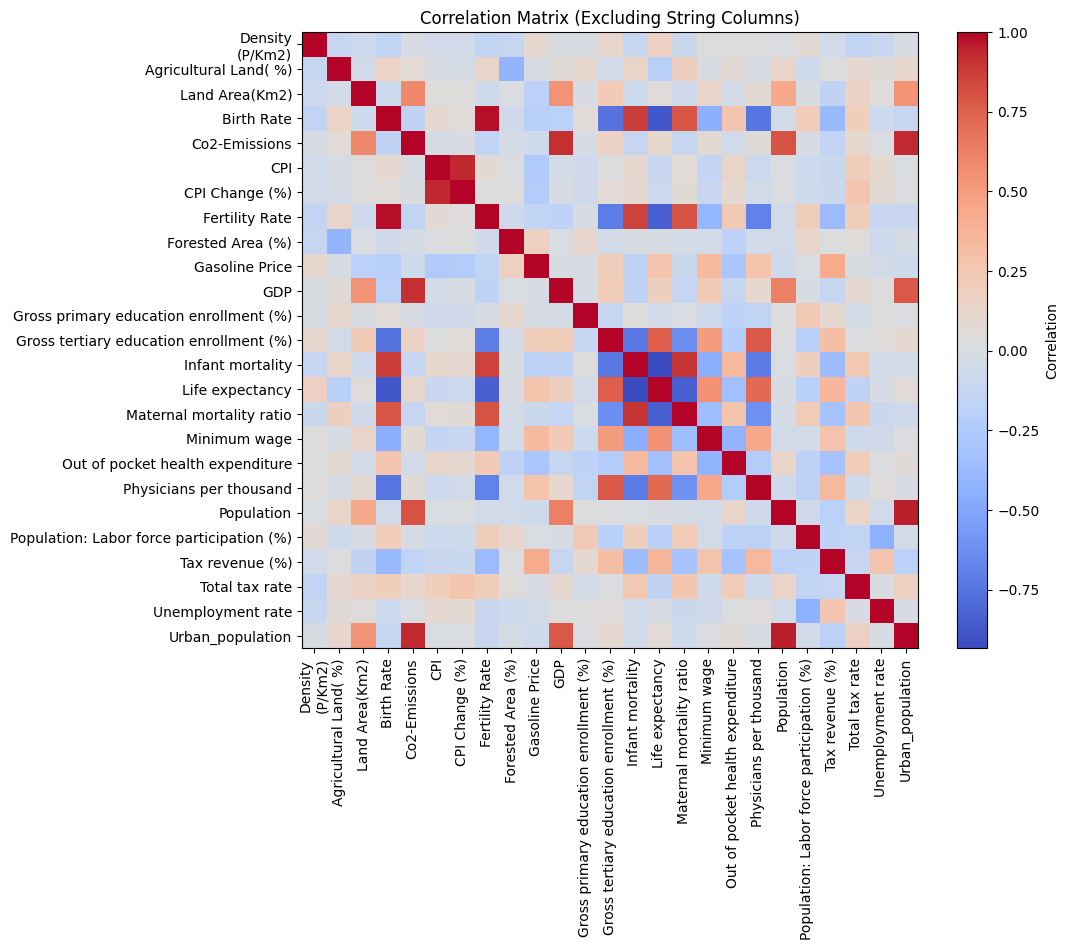


Variables with high multicollinearity:
['Gross tertiary education enrollment (%)', 'GDP', 'Birth Rate', 'Co2-Emissions', 'Life expectancy', 'Fertility Rate', 'CPI', 'Population', 'Infant mortality', 'CPI Change (%)', 'Maternal mortality ratio', 'Urban_population', 'Physicians per thousand']


In [449]:
def get_corr_matrix():
    numeric_columns = world_data.select_dtypes(include=['number'])
    correlation_matrix = numeric_columns.corr()

    plt.figure(figsize=(10, 8))
    plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')
    plt.colorbar(label='Correlation')
    plt.title('Correlation Matrix (Excluding String Columns)')
    plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
    plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
    plt.show()

    highly_correlated = (correlation_matrix.abs() > 0.7) & (correlation_matrix.abs() < 1.0)
    multicollinear_variables = set()
    for col in correlation_matrix.columns:
        multicollinear_variables.update(set(correlation_matrix.index[highly_correlated[col]]))
    multicollinear_variables = list(multicollinear_variables)

    print("\nVariables with high multicollinearity:")
    print(multicollinear_variables)

get_corr_matrix()

In [450]:
print("Life expectancy vs Birth rate correlation:", world_data['Life expectancy'].corr(world_data['Birth Rate']))
print("Life expectancy vs Fertility rate correlation:", world_data['Life expectancy'].corr(world_data['Fertility Rate']))
print("Life expectancy vs Infant mortality correlation:", world_data['Life expectancy'].corr(world_data['Infant mortality']))
print("Life expectancy vs Maternal mortality ratio correlation:", world_data['Life expectancy'].corr(world_data['Maternal mortality ratio']))
print("Life expectancy vs Gross tertiary education enrollment (%) correlation:", world_data['Life expectancy'].corr(world_data['Gross tertiary education enrollment (%)']))
print("Life expectancy vs Physicians per thousand correlation:", world_data['Life expectancy'].corr(world_data['Physicians per thousand']))


Life expectancy vs Birth rate correlation: -0.8783627506459828
Life expectancy vs Fertility rate correlation: -0.8506128647352631
Life expectancy vs Infant mortality correlation: -0.9340532269063946
Life expectancy vs Maternal mortality ratio correlation: -0.8474827435596342
Life expectancy vs Gross tertiary education enrollment (%) correlation: 0.7615525570907443
Life expectancy vs Physicians per thousand correlation: 0.7155767128088059


In [451]:
print("Physicians per thousand vs Gross tertiary education enrollment (%) correlation:", world_data['Physicians per thousand'].corr(world_data['Gross tertiary education enrollment (%)']))

Physicians per thousand vs Gross tertiary education enrollment (%) correlation: 0.7875868110132871


In [452]:
print("GDP vs CPI Change (%) correlation:", world_data['GDP'].corr(world_data['CPI Change (%)']))
print("GDP vs CPI correlation:", world_data['GDP'].corr(world_data['CPI']))
print("GDP vs Urban_population correlation:", world_data['GDP'].corr(world_data['Urban_population']))
print("GDP vs Co2-Emissions correlation:", world_data['GDP'].corr(world_data['Co2-Emissions']))
print("GDP vs Population correlation:", world_data['GDP'].corr(world_data['Population']))

GDP vs CPI Change (%) correlation: -0.006362311167748869
GDP vs CPI correlation: -0.02799995507103393
GDP vs Urban_population correlation: 0.7824471424502627
GDP vs Co2-Emissions correlation: 0.9163128217011677
GDP vs Population correlation: 0.6288286231178897


In [453]:
print("CPI vs CPI Change (%) correlation:", world_data['CPI'].corr(world_data['CPI Change (%)']))
print("CPI vs Urban_population correlation:", world_data['CPI'].corr(world_data['Urban_population']))
print("CPI vs Co2-Emissions correlation:", world_data['CPI'].corr(world_data['Co2-Emissions']))
print("CPI vs Population correlation:", world_data['CPI'].corr(world_data['Population']))

CPI vs CPI Change (%) correlation: 0.9364256250248332
CPI vs Urban_population correlation: 0.008055244629328518
CPI vs Co2-Emissions correlation: -0.011339867648857908
CPI vs Population correlation: 0.008869958506319782


In [454]:
print("CPI Change (%) vs Urban_population correlation:", world_data['CPI Change (%)'].corr(world_data['Urban_population']))
print("CPI Change (%) vs Co2-Emissions correlation:", world_data['CPI Change (%)'].corr(world_data['Co2-Emissions']))
print("CPI Change (%) vs Population correlation:", world_data['CPI Change (%)'].corr(world_data['Population']))

CPI Change (%) vs Urban_population correlation: 0.017123785394464748
CPI Change (%) vs Co2-Emissions correlation: 0.0020878150848206724
CPI Change (%) vs Population correlation: 0.011998830840981965


In [455]:
print("Urban_population vs Co2-Emissions correlation:", world_data['Urban_population'].corr(world_data['Co2-Emissions']))
print("Urban_population vs Population correlation:", world_data['Urban_population'].corr(world_data['Population']))

Urban_population vs Co2-Emissions correlation: 0.9260742793224854
Urban_population vs Population correlation: 0.9537396721692657


In [456]:
# Remove columns with high colinearity
world_data.drop(columns=['Birth Rate'], inplace=True)
world_data.drop(columns=['Fertility Rate'], inplace=True)
world_data.drop(columns=['Infant mortality'], inplace=True)
world_data.drop(columns=['Maternal mortality ratio'], inplace=True)
world_data.drop(columns=['Co2-Emissions'], inplace=True)
world_data.drop(columns=['CPI Change (%)'], inplace=True)
world_data.drop(columns=['Urban_population'], inplace=True)
world_data.drop(columns=['Gross tertiary education enrollment (%)'], inplace=True)

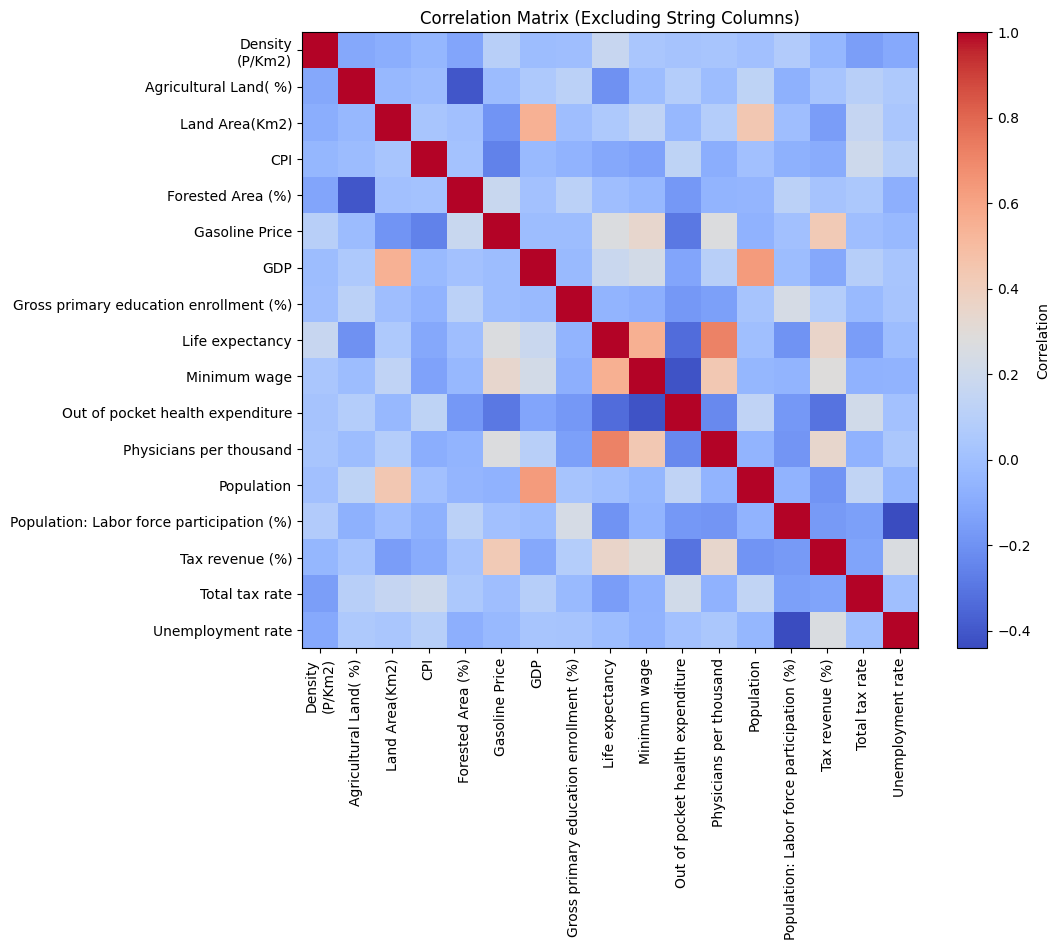


Variables with high multicollinearity:
['Physicians per thousand', 'Life expectancy']


In [457]:
get_corr_matrix()

In [458]:
world_data.rename(columns={'CPI': 'Consumer Price Index'}, inplace=True)
world_data.rename(columns={'Gasoline Price': 'Gasoline Price ($)'}, inplace=True)
world_data.rename(columns={'GDP': 'GDP ($)'}, inplace=True)
world_data.rename(columns={'Minimum wage': 'Minimum wage ($)'}, inplace=True)
world_data.rename(columns={'Out of pocket health expenditure': 'Out of pocket health expenditure (%)'}, inplace=True)
world_data.rename(columns={'Total tax rate': 'Total tax rate (%)'}, inplace=True)
world_data.rename(columns={'Unemployment rate': 'Unemployment rate (%)'}, inplace=True)

with pd.option_context('display.max_rows', None, 'display.max_columns', None):      
    display(world_data)

,Country,Density\n(P/Km2),Agricultural Land( %),Land Area(Km2),Consumer Price Index,Forested Area (%),Gasoline Price ($),GDP ($),Gross primary education enrollment (%),Life expectancy,Minimum wage ($),Official language,Out of pocket health expenditure (%),Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate (%),Unemployment rate (%)
0,Afghanistan,60.0,0.581,652230.0,149.90,0.021,0.70,1.910135e+10,1.04,64.5,0.43,Pashto,0.784,0.28,3.804175e+07,0.489,0.09,0.714,0.1112
1,Albania,105.0,0.431,28748.0,119.05,0.281,1.36,1.527808e+10,1.07,78.5,1.12,Albanian,0.569,1.20,2.854191e+06,0.557,0.19,0.366,0.1233
2,Algeria,18.0,0.174,2381741.0,151.36,0.008,0.28,1.699882e+11,1.10,76.7,0.95,Arabic,0.281,1.72,4.305305e+07,0.412,0.37,0.661,0.1170
4,Angola,26.0,0.475,1246700.0,261.73,0.463,0.97,9.463542e+10,1.14,60.8,0.71,Portuguese,0.334,0.21,3.182530e+07,0.775,0.09,0.491,0.0689
6,Argentina,17.0,0.543,2780400.0,232.75,0.098,1.10,4.496634e+11,1.10,76.5,3.35,Spanish,0.176,3.96,4.493871e+07,0.613,0.10,1.063,0.0979
7,Armenia,104.0,0.589,29743.0,129.18,0.117,0.77,1.367280e+10,0.93,74.9,0.66,Armenian,0.816,4.40,2.957731e+06,0.556,0.21,0.226,0.1699
8,Australia,3.0,0.482,7741220.0,119.80,0.163,0.93,1.392681e+12,1.00,82.7,13.59,English,0.196,3.68,2.576660e+07,0.655,0.23,0.474,0.0527
9,Austria,109.0,0.324,83871.0,118.06,0.469,1.20,4.463147e+11,1.03,81.6,2.14,German,0.179,5.17,8.877067e+06,0.607,0.25,0.514,0.0467
10,Azerbaijan,123.0,0.577,86600.0,156.32,0.141,0.56,3.920700e+10,1.00,72.9,0.47,Azerbaijani language,0.786,3.45,1.002332e+07,0.665,0.13,0.407,0.0551
11,The Bahamas,39.0,0.014,13880.0,116.22,0.514,0.92,1.282700e+10,0.81,73.8,5.25,English,0.278,1.94,3.894820e+05,0.746,0.15,0.338,0.1036


In [459]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

with pd.option_context('display.max_rows', None, 'display.max_columns', None):      
    display(world)



C:\Users\adamc\AppData\Local\Temp\ipykernel_27136\2709736339.py:6: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,8.899530e+05,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,5.800546e+07,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,6.032530e+05,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,3.758926e+07,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,3.282395e+08,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
5,1.851393e+07,Asia,Kazakhstan,KAZ,181665,"POLYGON ((87.35997 49.21498, 86.59878 48.54918..."
6,3.358065e+07,Asia,Uzbekistan,UZB,57921,"POLYGON ((55.96819 41.30864, 55.92892 44.99586..."
7,8.776109e+06,Oceania,Papua New Guinea,PNG,24829,"MULTIPOLYGON (((141.00021 -2.60015, 142.73525 ..."
8,2.706256e+08,Asia,Indonesia,IDN,1119190,"MULTIPOLYGON (((141.00021 -2.60015, 141.01706 ..."
9,4.493871e+07,South America,Argentina,ARG,445445,"MULTIPOLYGON (((-68.63401 -52.63637, -68.25000..."


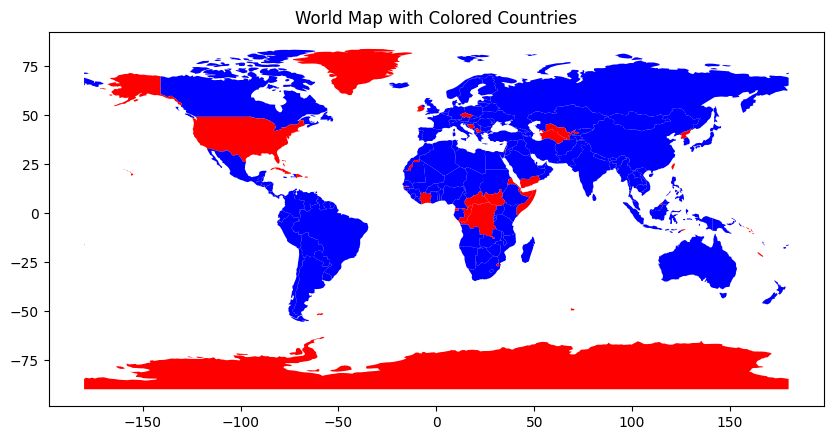

['W. Sahara',
 'United States of America',
 'Uzbekistan',
 'Dem. Rep. Congo',
 'Somalia',
 'Dominican Rep.',
 'Bahamas',
 'Falkland Is.',
 'Greenland',
 'Fr. S. Antarctic Lands',
 'Timor-Leste',
 'Puerto Rico',
 'Cuba',
 "Côte d'Ivoire",
 'Central African Rep.',
 'Congo',
 'Eq. Guinea',
 'eSwatini',
 'Palestine',
 'Gambia',
 'North Korea',
 'Turkmenistan',
 'Ireland',
 'New Caledonia',
 'Solomon Is.',
 'Taiwan',
 'Brunei',
 'Czechia',
 'Eritrea',
 'Yemen',
 'Antarctica',
 'N. Cyprus',
 'Djibouti',
 'Somaliland',
 'Bosnia and Herz.',
 'North Macedonia',
 'Kosovo',
 'S. Sudan']

In [460]:
def world_map():
    country_names = world_data['Country']

    world_with_data = world.merge(country_names, how='left', left_on='name', right_on='Country')

    world_with_data['Color'] = 'red'  
    world_with_data.loc[world_with_data['Country'].notnull(), 'Color'] = 'blue' 

    fig, ax = plt.subplots(1, 1, figsize=(10, 6))
    world_with_data.plot(color=world_with_data['Color'], ax=ax)
    ax.set_title("World Map with Colored Countries")
    plt.show()

    red_countries = world_with_data.loc[world_with_data['Color'] == 'red', 'name'].tolist()

    with pd.option_context('display.max_rows', None, 'display.max_columns', None):      
        display(red_countries)
    
world_map()

In [461]:
print(world_data.loc[186, 'Country'])
print(world_data.loc[45, 'Country'])
print(world_data.loc[49, 'Country'])
print(world_data.loc[11, 'Country'])
print(world_data.loc[174, 'Country'])
print(world_data.loc[28, 'Country'])
print(world_data.loc[33, 'Country'])
print(world_data.loc[39, 'Country'])
print(world_data.loc[53, 'Country'])
print(world_data.loc[62, 'Country'])
print(world_data.loc[81, 'Country'])
print(world_data.loc[21, 'Country'])
print(world_data.loc[44, 'Country'])




United States
Democratic Republic of the Congo
Dominican Republic
The Bahamas
East Timor
Ivory Coast
Central African Republic
Republic of the Congo
Equatorial Guinea
The Gambia
Republic of Ireland
Bosnia and Herzegovina
Czech Republic


In [462]:
# Rename countries 
world_data.loc[186, 'Country'] = 'United States of America'
world_data.loc[45, 'Country'] = 'Dem. Rep. Congo'
world_data.loc[49, 'Country'] = 'Dominican Rep.'
world_data.loc[11, 'Country'] = 'Bahamas'
world_data.loc[174, 'Country'] = 'Timor-Leste'
world_data.loc[28, 'Country'] = 'Côte d\'Ivoire'
world_data.loc[33, 'Country'] = 'Central African Rep.'
world_data.loc[39, 'Country'] = 'Congo'
world_data.loc[53, 'Country'] = 'Eq. Guinea'
world_data.loc[62, 'Country'] = 'Gambia'
world_data.loc[81, 'Country'] = 'Ireland'
world_data.loc[21, 'Country'] = 'Bosnia and Herz.'
world_data.loc[44, 'Country'] = 'Czechia'


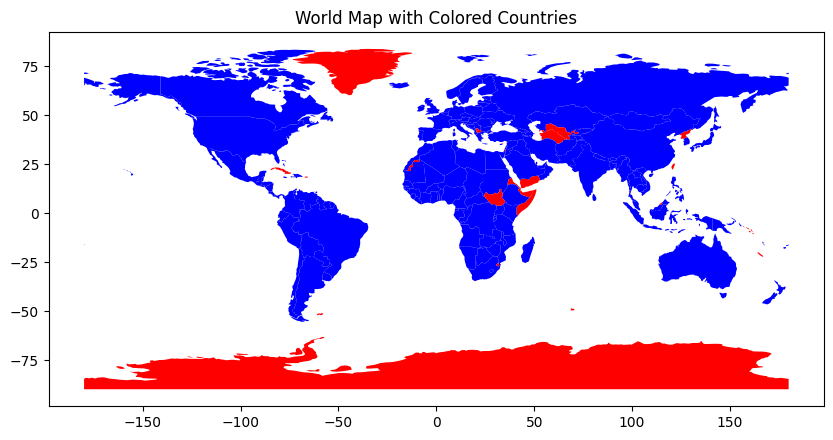

['W. Sahara',
 'Uzbekistan',
 'Somalia',
 'Falkland Is.',
 'Greenland',
 'Fr. S. Antarctic Lands',
 'Puerto Rico',
 'Cuba',
 'eSwatini',
 'Palestine',
 'North Korea',
 'Turkmenistan',
 'New Caledonia',
 'Solomon Is.',
 'Taiwan',
 'Brunei',
 'Eritrea',
 'Yemen',
 'Antarctica',
 'N. Cyprus',
 'Djibouti',
 'Somaliland',
 'North Macedonia',
 'Kosovo',
 'S. Sudan']

In [463]:
world_map()

In [464]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):      
    display(world_data.head())

,Country,Density\n(P/Km2),Agricultural Land( %),Land Area(Km2),Consumer Price Index,Forested Area (%),Gasoline Price ($),GDP ($),Gross primary education enrollment (%),Life expectancy,Minimum wage ($),Official language,Out of pocket health expenditure (%),Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate (%),Unemployment rate (%)
0,Afghanistan,60.0,0.581,652230.0,149.90,0.021,0.70,1.910135e+10,1.04,64.5,0.43,Pashto,0.784,0.28,38041754.0,0.489,0.09,0.714,0.1112
1,Albania,105.0,0.431,28748.0,119.05,0.281,1.36,1.527808e+10,1.07,78.5,1.12,Albanian,0.569,1.20,2854191.0,0.557,0.19,0.366,0.1233
2,Algeria,18.0,0.174,2381741.0,151.36,0.008,0.28,1.699882e+11,1.10,76.7,0.95,Arabic,0.281,1.72,43053054.0,0.412,0.37,0.661,0.1170
4,Angola,26.0,0.475,1246700.0,261.73,0.463,0.97,9.463542e+10,1.14,60.8,0.71,Portuguese,0.334,0.21,31825295.0,0.775,0.09,0.491,0.0689
6,Argentina,17.0,0.543,2780400.0,232.75,0.098,1.10,4.496634e+11,1.10,76.5,3.35,Spanish,0.176,3.96,44938712.0,0.613,0.10,1.063,0.0979


In [465]:
from sklearn.preprocessing import MinMaxScaler

columns_to_normalize = ['Density\n(P/Km2)', 'Agricultural Land( %)', 'Land Area(Km2)', 
                        'Consumer Price Index', 'Forested Area (%)', 'Gasoline Price ($)', 
                        'GDP ($)', 'Gross primary education enrollment (%)', 'Life expectancy', 
                        'Minimum wage ($)', 'Out of pocket health expenditure (%)', 
                        'Physicians per thousand', 'Population', 'Population: Labor force participation (%)', 
                        'Tax revenue (%)', 'Total tax rate (%)', 'Unemployment rate (%)']


scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(world_data[columns_to_normalize])
world_data_normalized = pd.DataFrame(normalized_data, columns=columns_to_normalize)

In [466]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):      
    display(world_data_normalized.head())

,Density\n(P/Km2),Agricultural Land( %),Land Area(Km2),Consumer Price Index,Forested Area (%),Gasoline Price ($),GDP ($),Gross primary education enrollment (%),Life expectancy,Minimum wage ($),Out of pocket health expenditure (%),Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate (%),Unemployment rate (%)
0,0.006941,0.701220,0.038129,0.019067,0.021363,0.386740,0.000853,0.5250,0.372611,0.030928,0.958060,0.037975,0.027147,0.202105,0.243243,0.643149,0.392666
1,0.012326,0.518293,0.001664,0.007384,0.285860,0.751381,0.000675,0.5625,0.818471,0.081738,0.676278,0.167370,0.001970,0.345263,0.513514,0.287321,0.435742
2,0.001915,0.204878,0.139282,0.019620,0.008138,0.154696,0.007895,0.6000,0.761146,0.069219,0.298820,0.240506,0.030733,0.040000,1.000000,0.588957,0.413314
3,0.002872,0.571951,0.072898,0.061415,0.471007,0.535912,0.004378,0.6500,0.254777,0.051546,0.368283,0.028129,0.022699,0.804211,0.243243,0.415133,0.242079
4,0.001795,0.654878,0.162599,0.050441,0.099695,0.607735,0.020947,0.6000,0.754777,0.245950,0.161206,0.555556,0.032082,0.463158,0.270270,1.000000,0.345319


In [467]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(world_data_normalized)
pca_data = pca.transform(world_data_normalized)
per_var = np.round(pca.explained_variance_ratio_ * 100, decimals=1)
print(per_var) 


[24.5 16.  11.5 ...  1.1  1.   0.6]


Text(0.5, 1.0, 'Scree plot')

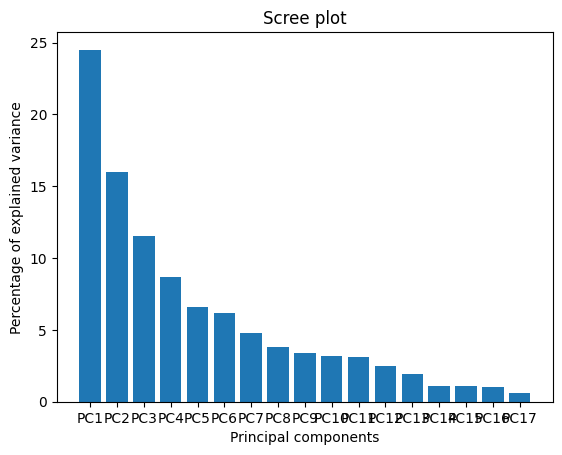

In [468]:
labels = ["PC"+str(i) for i in range(1, len(per_var)+1)]
plt.bar(x=range(1, len(per_var)+1), height=per_var, tick_label = labels)
plt.ylabel("Percentage of explained variance")
plt.xlabel("Principal components")
plt.title("Scree plot")


In [469]:
pca_df = pd.DataFrame(pca_data, index=world_data.index, columns=labels)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):      
    display(pca_df.head())

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17
0,0.670386,-0.461557,-0.370314,-0.020717,0.139384,-0.033180,-0.127663,0.085387,0.065617,-0.171983,-0.027276,-0.116073,0.011111,-0.068893,-0.012671,0.015498,0.030503
1,0.001962,-0.169689,-0.240498,0.136352,0.023028,-0.214840,0.008130,0.158888,-0.188538,-0.068342,0.044194,-0.106795,-0.119887,-0.075020,0.054020,-0.100136,0.026636
2,-0.142991,-0.232005,-0.472579,0.177916,-0.362512,0.201575,-0.008547,0.160372,0.297503,-0.343427,0.161658,0.454281,0.059687,-0.074158,-0.029507,0.105931,0.004845
4,0.452871,0.220603,0.299301,0.090445,0.108588,0.058590,0.026688,0.066673,0.068636,0.020017,-0.089486,-0.124943,0.015014,0.019948,0.019668,-0.010485,-0.012722
6,-0.190545,-0.333398,0.051210,-0.048811,0.296391,0.236004,-0.063925,0.131044,0.594244,-0.092302,0.116610,-0.255374,-0.021693,-0.059620,0.008777,0.023098,-0.049199


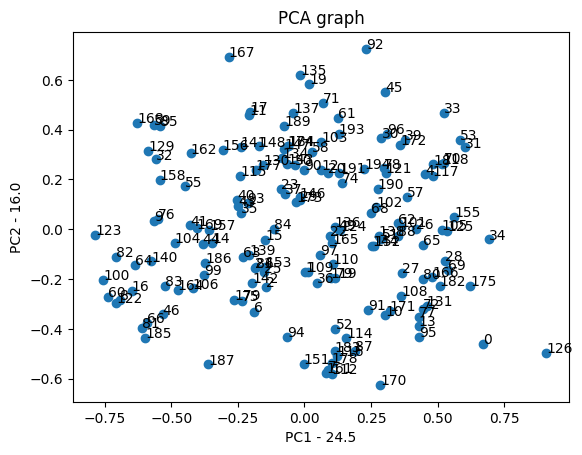

In [470]:
plt.scatter(pca_df.PC1, pca_df.PC2)
plt.title("PCA graph")
plt.xlabel(f"PC1 - {per_var[0]}")
plt.ylabel(f"PC2 - {per_var[1]}")

for sample in pca_df.index:
    plt.annotate(sample, (pca_df.PC1.loc[sample], pca_df.PC2.loc[sample]))

In [471]:
loading_scores = pd.Series(pca.components_[0], index=[world_data_normalized]) #PC1
np.set_printoptions(threshold=False)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(loading_scores)

Density\n(P/Km2)                            -0.021087
Agricultural Land( %)                        0.164271
Land Area(Km2)                              -0.013994
Consumer Price Index                         0.040700
Forested Area (%)                           -0.081160
Gasoline Price ($)                          -0.251942
GDP ($)                                     -0.045322
Gross primary education enrollment (%)       0.018996
Life expectancy                             -0.563236
Minimum wage ($)                            -0.377837
Out of pocket health expenditure (%)         0.378474
Physicians per thousand                     -0.460710
Population                                   0.032446
Population: Labor force participation (%)    0.083634
Tax revenue (%)                             -0.260068
Total tax rate (%)                           0.081939
Unemployment rate (%)                       -0.018798
dtype: float64


In [472]:
sorted_loading_scores = loading_scores.abs().sort_values(ascending=False)
top_17 = sorted_loading_scores[0:17].index.values
print(loading_scores[top_17])

Life expectancy                             -0.563236
Physicians per thousand                     -0.460710
Out of pocket health expenditure (%)         0.378474
Minimum wage ($)                            -0.377837
Tax revenue (%)                             -0.260068
Gasoline Price ($)                          -0.251942
Agricultural Land( %)                        0.164271
Population: Labor force participation (%)    0.083634
Total tax rate (%)                           0.081939
Forested Area (%)                           -0.081160
GDP ($)                                     -0.045322
Consumer Price Index                         0.040700
Population                                   0.032446
Density\n(P/Km2)                            -0.021087
Gross primary education enrollment (%)       0.018996
Unemployment rate (%)                       -0.018798
Land Area(Km2)                              -0.013994
dtype: float64


In [473]:
world_data_normalized = world_data_normalized.reset_index(drop=True)
world_data = world_data.reset_index(drop=True)

world_data_normalized['Country'] = world_data['Country']
world_data_normalized['Official language'] = world_data['Official language']

In [474]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

def draw_dendrogram(key, method):
    # subset_indices = np.random.choice(len(world_data_normalized[key]), size=130, replace=False)
    # X_subset = world_data_normalized[key][subset_indices].values.reshape(-1, 1)
    # labels = world_data_normalized['Country'][subset_indices]  

    X_subset = world_data_normalized[key].values.reshape(-1, 1)
    labels = world_data_normalized['Country']

    clustering = AgglomerativeClustering(n_clusters=None, distance_threshold=0).fit(X_subset)
    cluster_labels = clustering.labels_

    plt.figure(figsize=(6, 14))  
    dendrogram = sch.dendrogram(sch.linkage(X_subset, method=method), labels=labels.values, orientation='left')  
    plt.title('Hierarchical Clustering Dendrogram')
    plt.xlabel('Distance')
    plt.ylabel('Countries')
    plt.show()


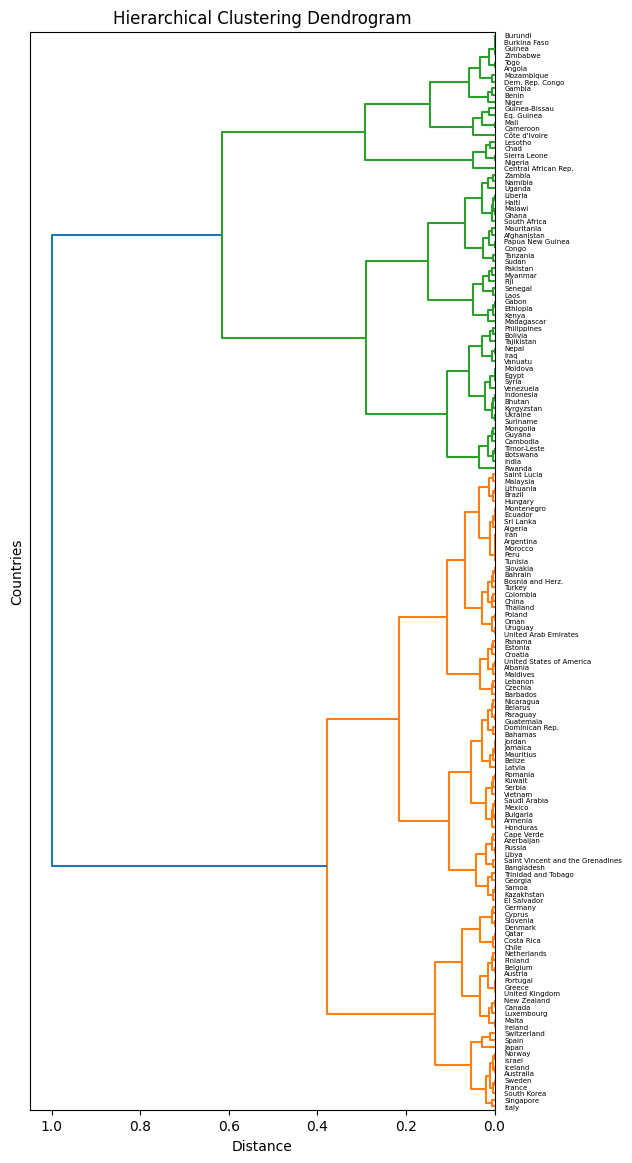

In [475]:
draw_dendrogram('Life expectancy', 'complete')
# Shows that more developed/western/european countries are in the orange cluster, while developing countries in Africa and Asia are in a separate cluster
# This validates the PCA results for life expectancy

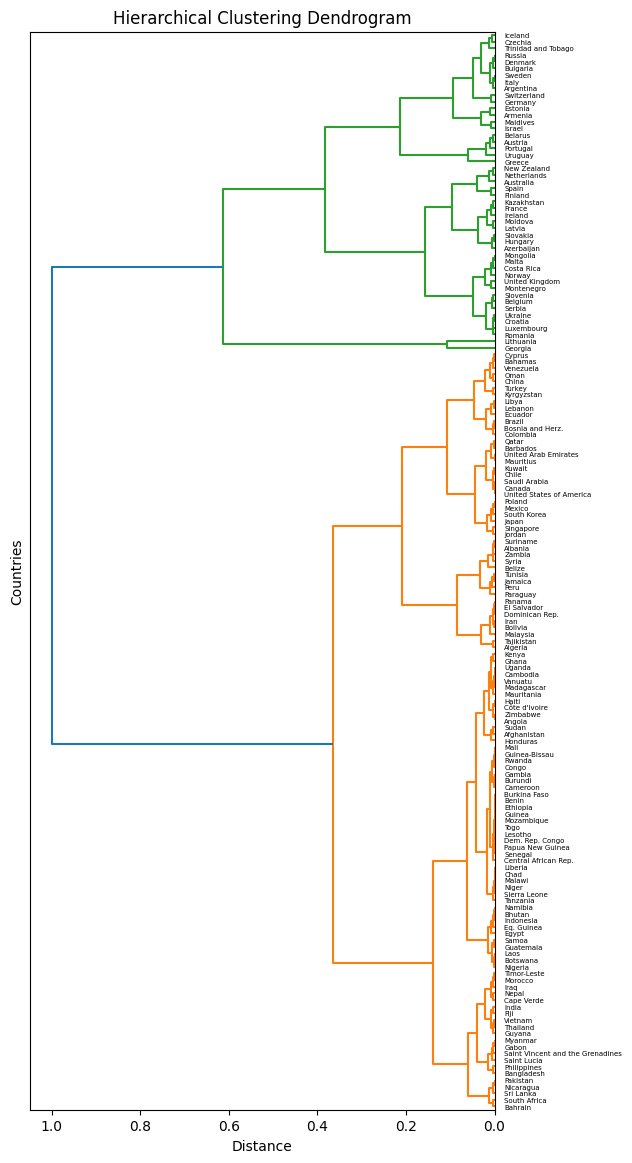

In [476]:
draw_dendrogram('Physicians per thousand', 'complete')
# Similar pattern to the previous dendrogram. Developed, western and european countries tend to be in one cluster, with a few exceptions such as
# Argentina, Kazakhstan whereas the other cluster tends to have developing countries from Africa and Asia, with the exception of Turkey,
# Bosnia and USA

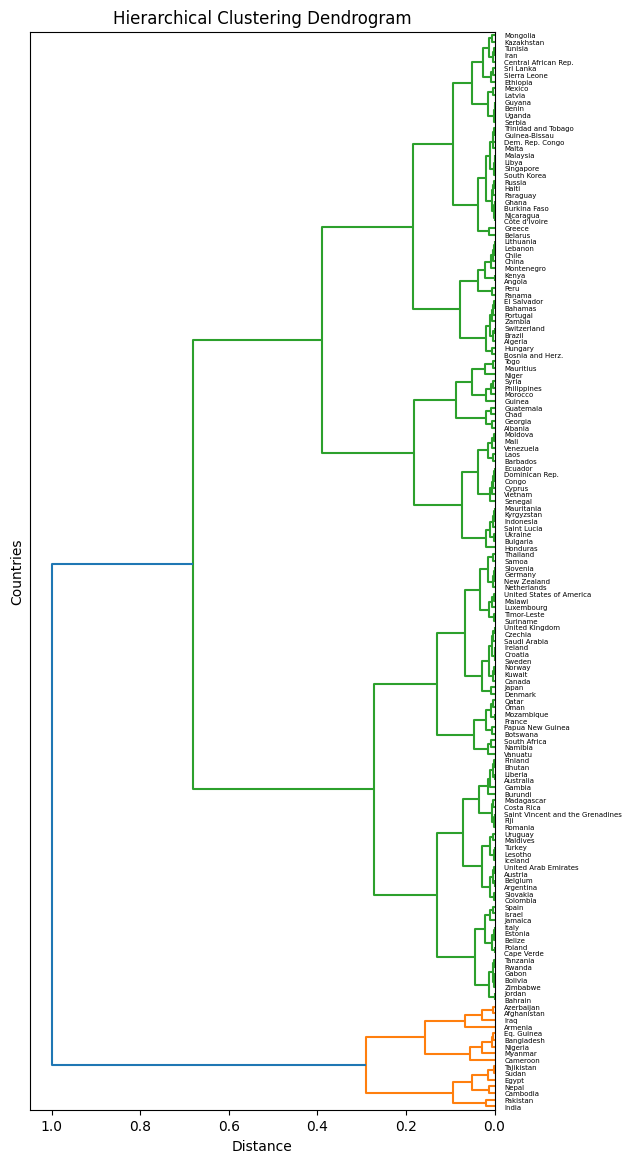

In [477]:
draw_dendrogram('Out of pocket health expenditure (%)', 'complete')
# Most countries belong in one cluster, while there are a few outliers which are in a separate cluster

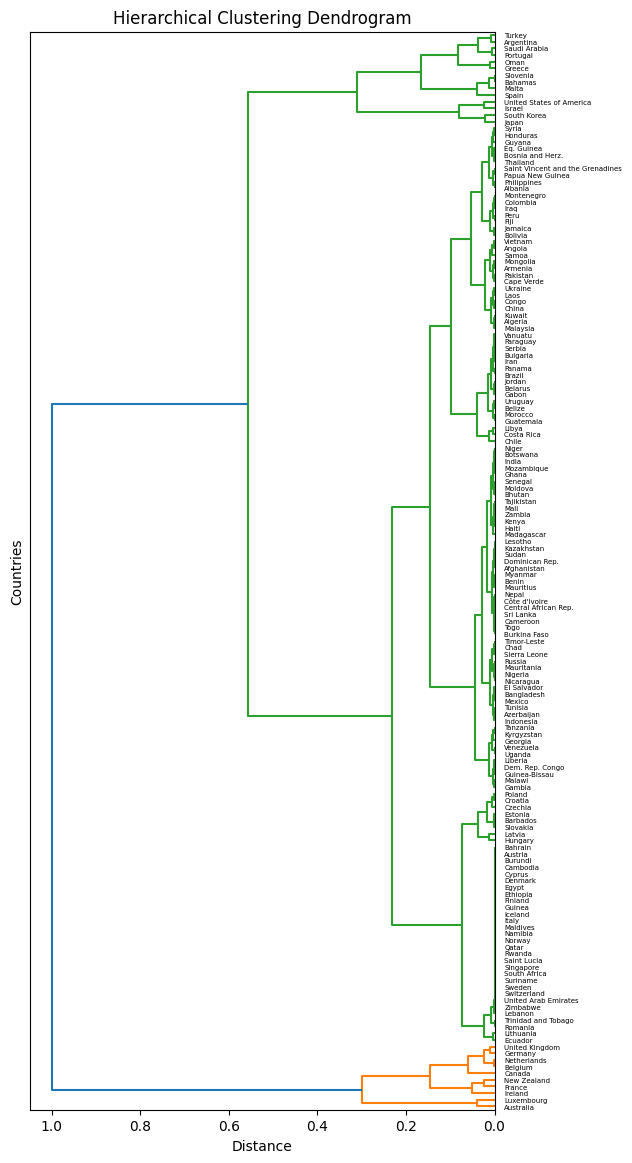

In [478]:
draw_dendrogram('Minimum wage ($)', 'complete')
# most countries are in one cluster while in the other cluster are countries that happen to be one of the most developed western countries in
# the world

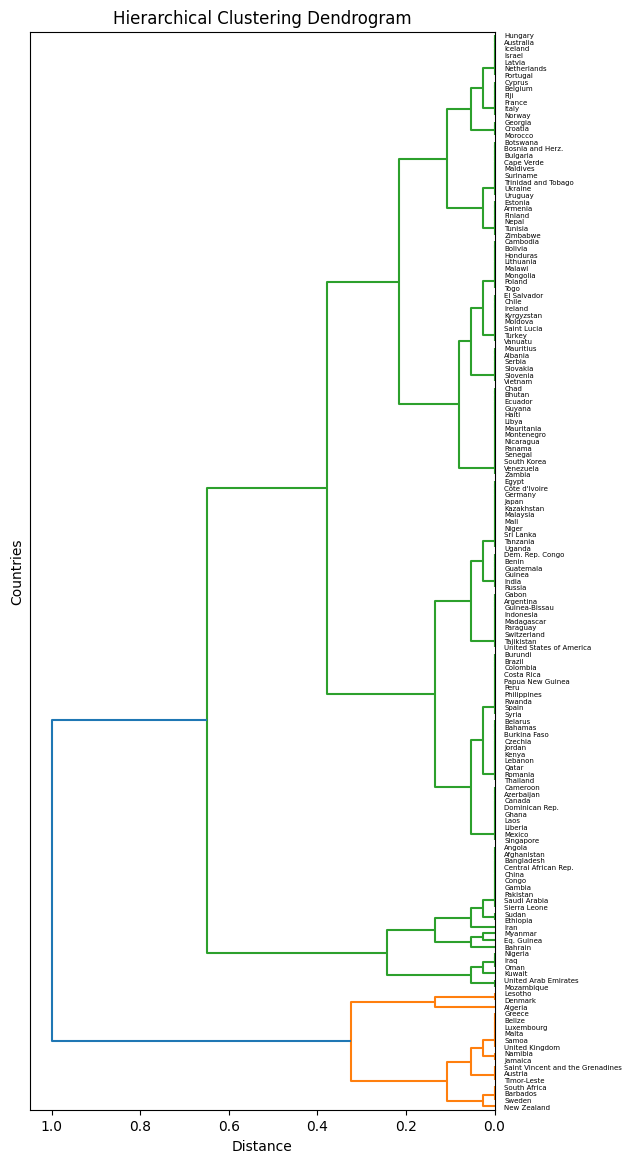

In [479]:
draw_dendrogram('Tax revenue (%)', 'complete')
# There are two clusters here but not sure what the clustering is indicative of because the split is not as obvious as with previous clusters.
# The bigger cluster has both developed and developing countries so it's not immediately obvious to me what makes those two clusters stand out

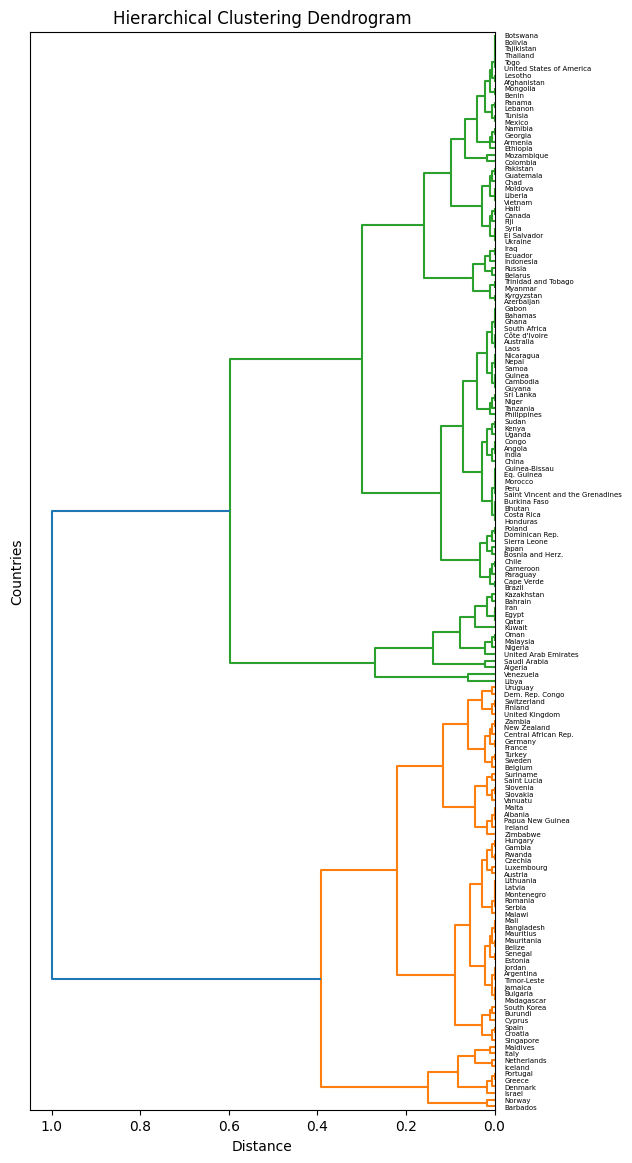

In [480]:
draw_dendrogram('Gasoline Price ($)', 'complete')
# The two clusters are somewhat equal but they both consist of developed and developing countries so not immediately obvious what makes 
# those clusters stand out except for the fact that one cluster has most of the european countries, while the other cluster has developed
# as well as developing countries from outside of europe

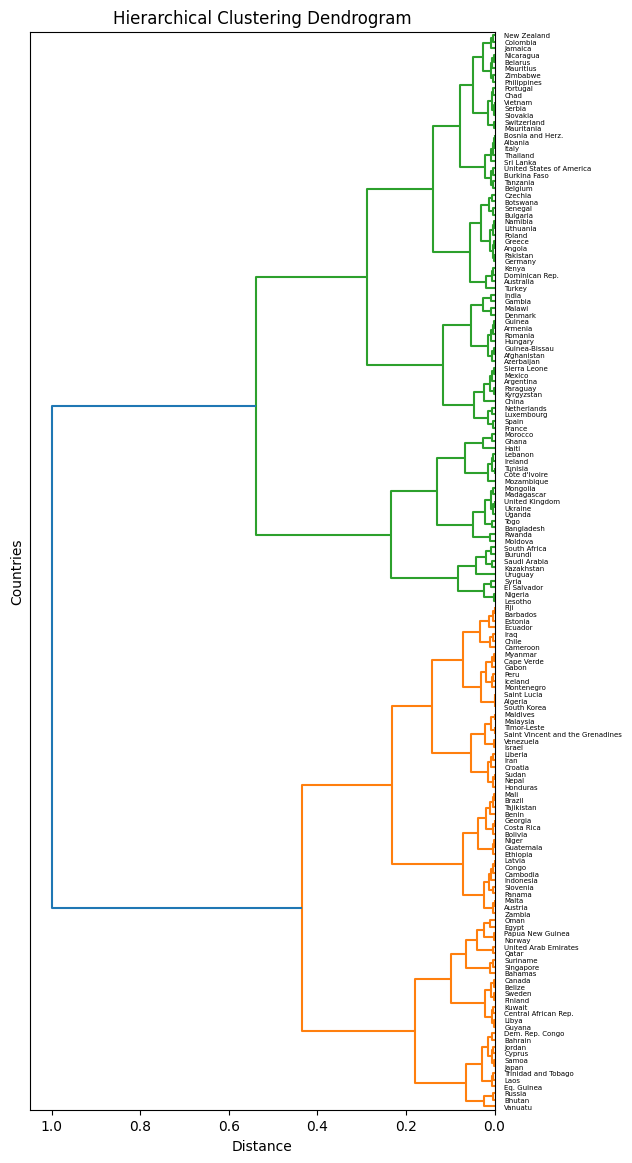

In [481]:
draw_dendrogram('Agricultural Land( %)', 'complete')
# Most of the developed, western, european countries are in one cluster (also with some developING countires) and the other cluster has fewer
# developed nations but more developing nations

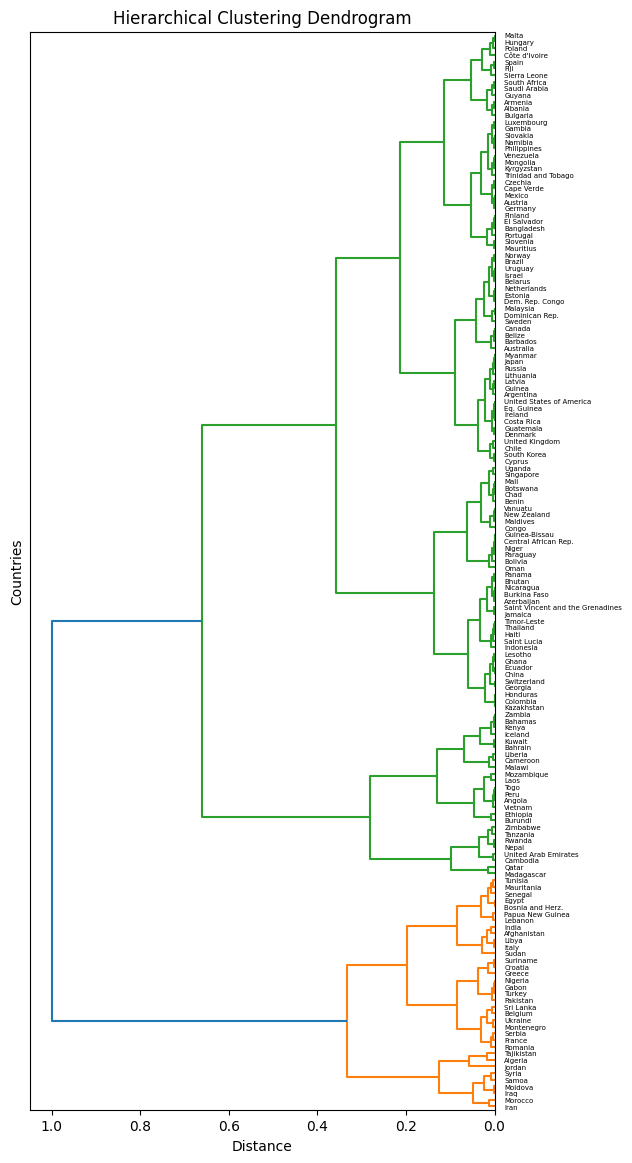

In [482]:
draw_dendrogram('Population: Labor force participation (%)', 'complete')
# Two discernible clusters. Corroborates PCA loading score

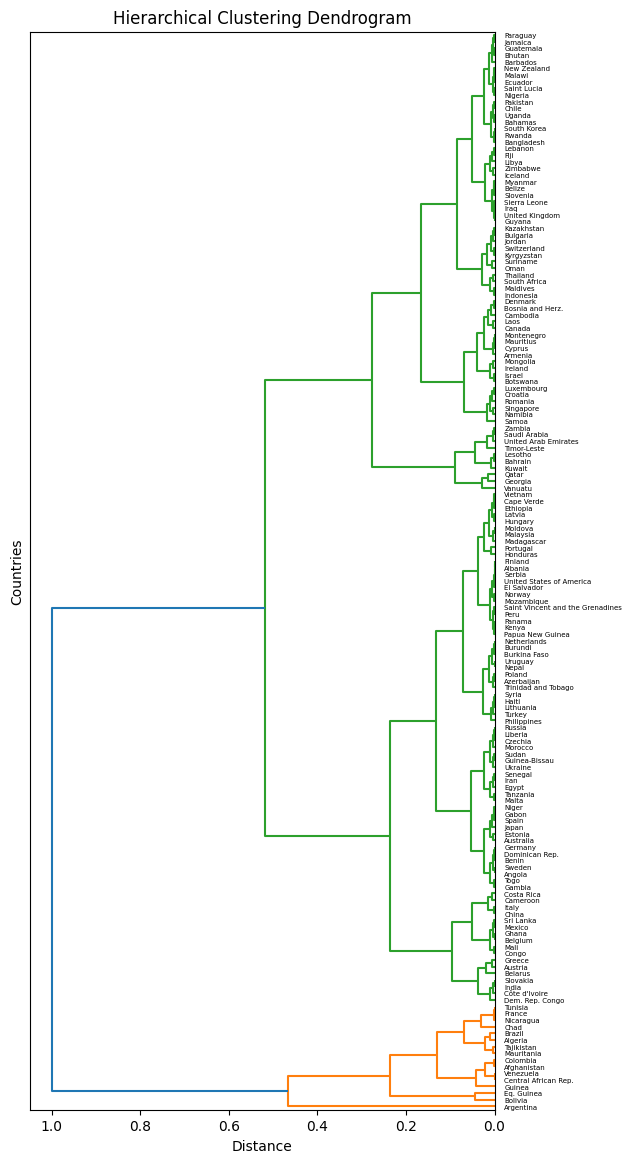

In [483]:
draw_dendrogram('Total tax rate (%)', 'complete')
# Two distinct clusters but again can't see what makes those two clusters stand out from each other. Corroborates relatively low loading score
# from PCA

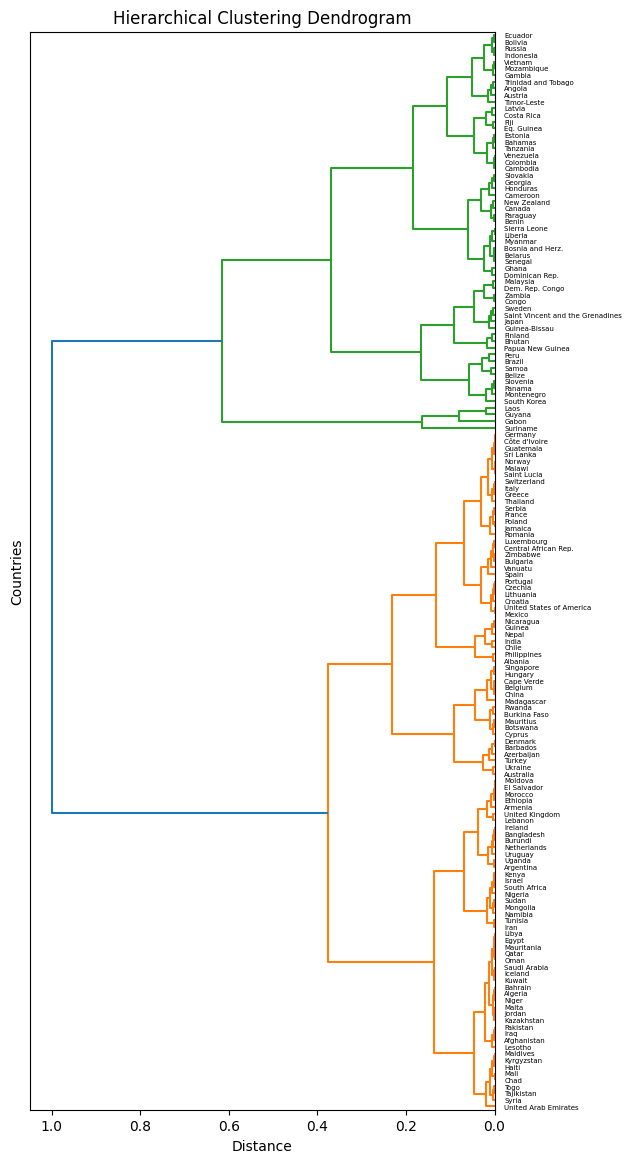

In [484]:
draw_dendrogram('Forested Area (%)', 'complete')
# Two distinct clusters however it is not clear why those 2 clusters stand out from each other, which would corroborate relatively low PCA
# loading score

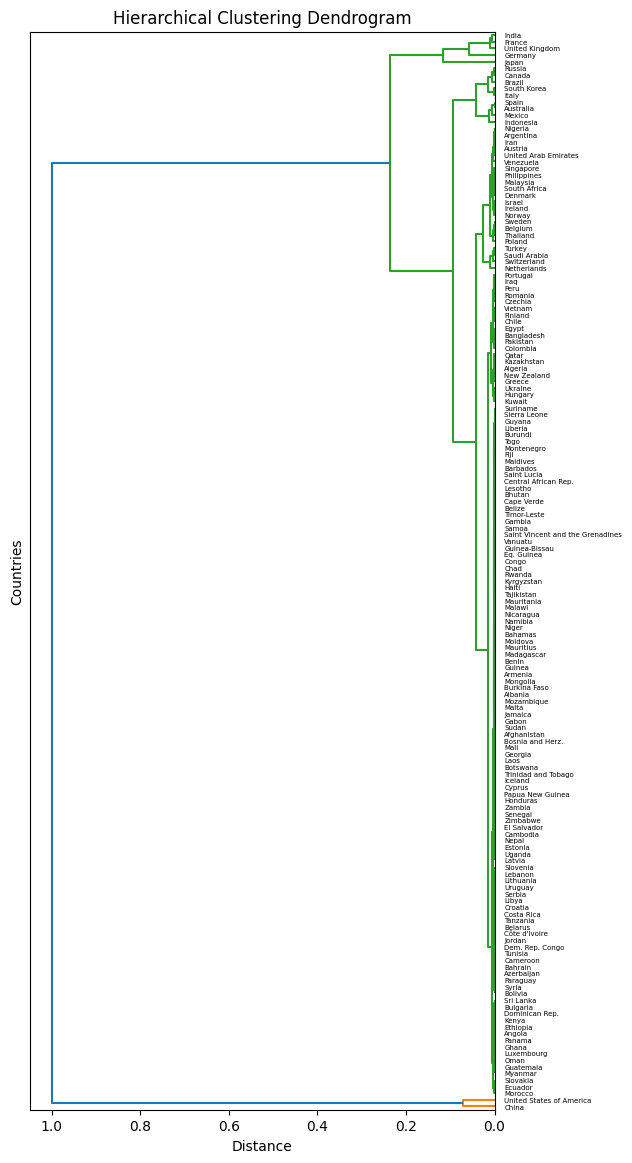

In [485]:
draw_dendrogram('GDP ($)', 'complete')
# Only a single significant cluster. Corroborates low loading score from PCA. Surprising that GPA doesn't play major role.

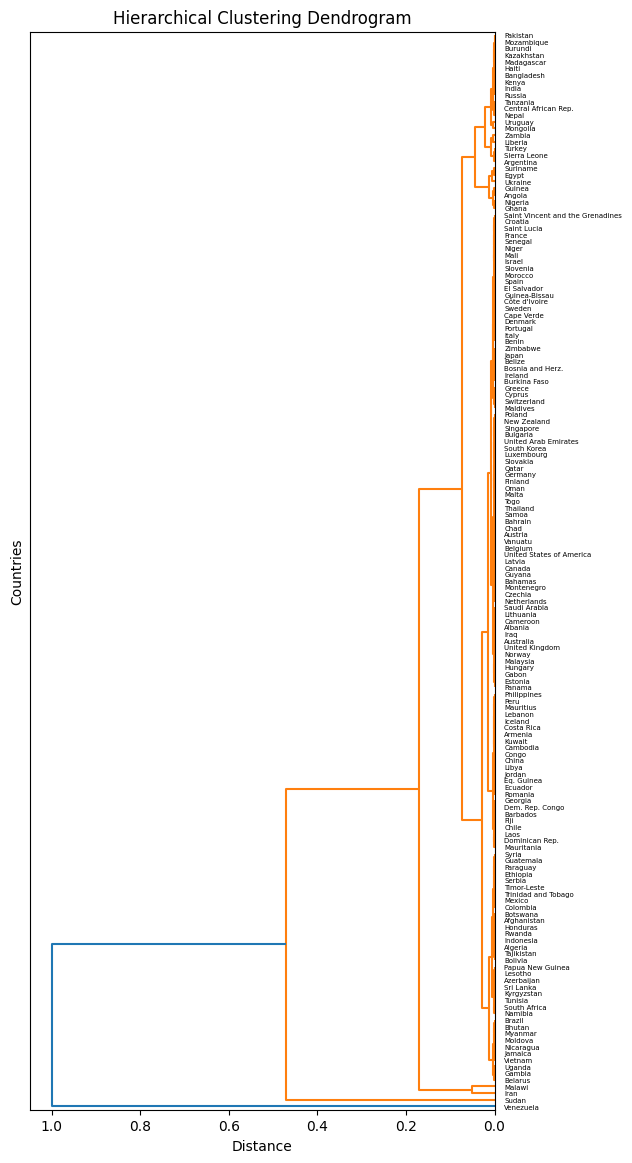

In [486]:
draw_dendrogram('Consumer Price Index', 'complete')
# No distinct clusters, corroborates low loading score

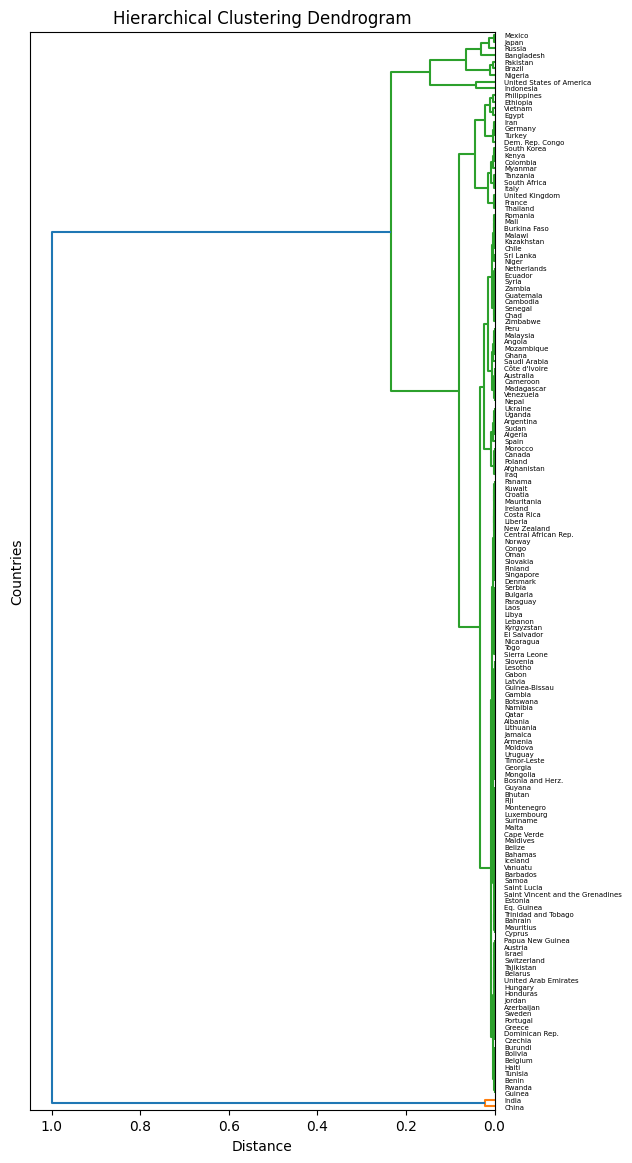

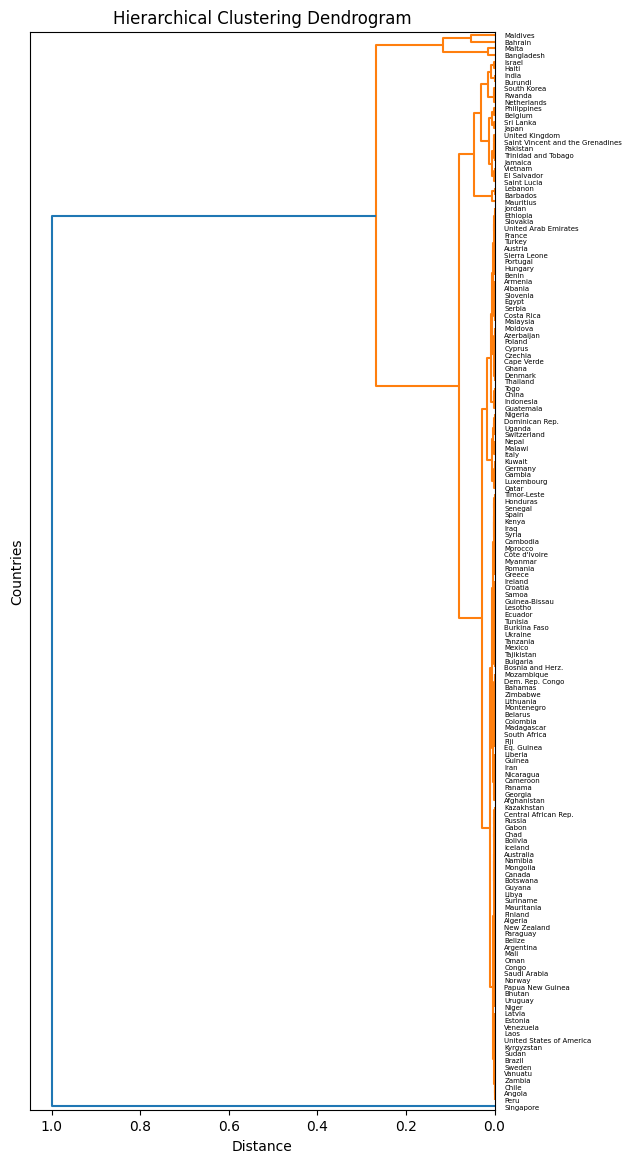

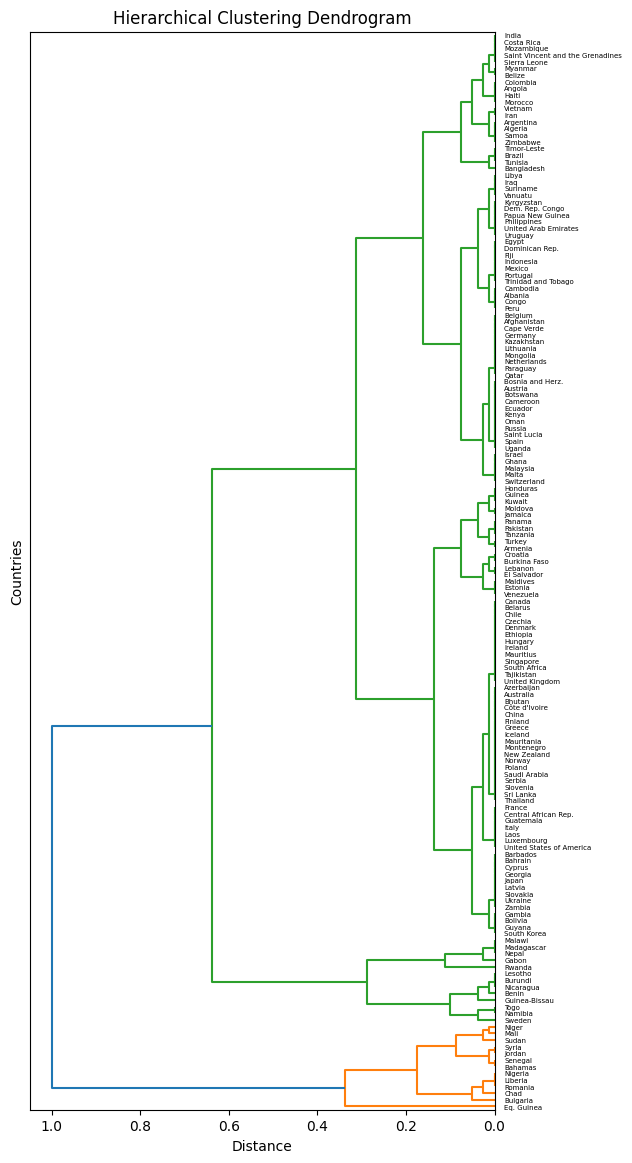

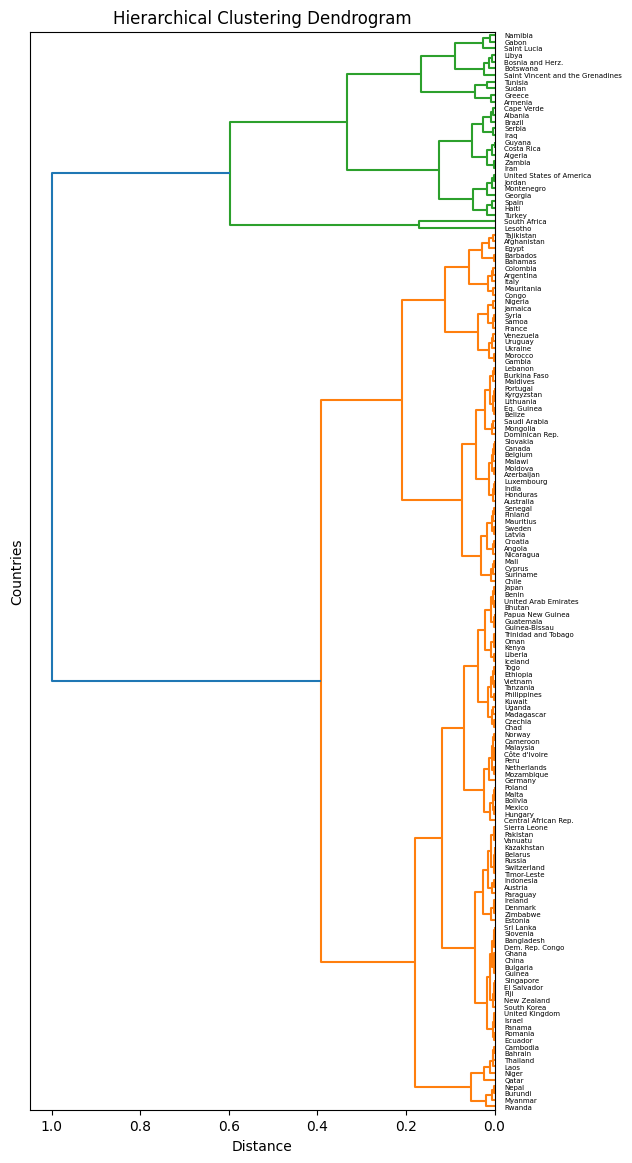

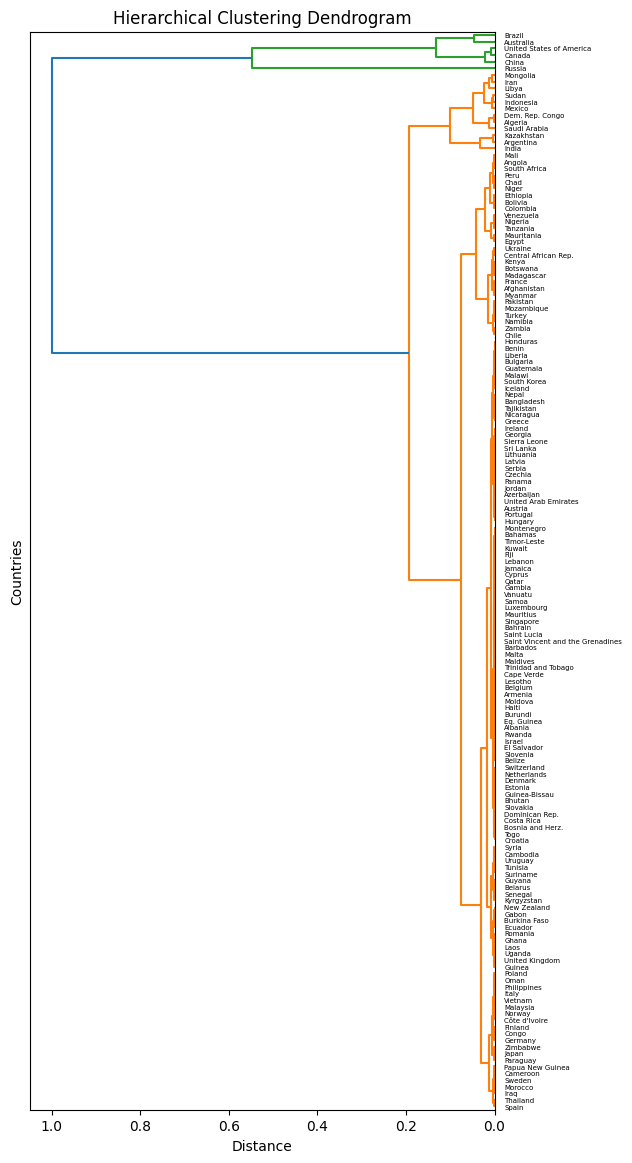

In [487]:
draw_dendrogram('Population', 'complete')
draw_dendrogram('Density\n(P/Km2)', 'complete')
draw_dendrogram('Gross primary education enrollment (%)', 'complete')
draw_dendrogram('Unemployment rate (%)', 'complete')
draw_dendrogram('Land Area(Km2)', 'complete')

In [488]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):      
    display(world_data_normalized.head())

,Density\n(P/Km2),Agricultural Land( %),Land Area(Km2),Consumer Price Index,Forested Area (%),Gasoline Price ($),GDP ($),Gross primary education enrollment (%),Life expectancy,Minimum wage ($),Out of pocket health expenditure (%),Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate (%),Unemployment rate (%),Country,Official language
0,0.006941,0.701220,0.038129,0.019067,0.021363,0.386740,0.000853,0.5250,0.372611,0.030928,0.958060,0.037975,0.027147,0.202105,0.243243,0.643149,0.392666,Afghanistan,Pashto
1,0.012326,0.518293,0.001664,0.007384,0.285860,0.751381,0.000675,0.5625,0.818471,0.081738,0.676278,0.167370,0.001970,0.345263,0.513514,0.287321,0.435742,Albania,Albanian
2,0.001915,0.204878,0.139282,0.019620,0.008138,0.154696,0.007895,0.6000,0.761146,0.069219,0.298820,0.240506,0.030733,0.040000,1.000000,0.588957,0.413314,Algeria,Arabic
3,0.002872,0.571951,0.072898,0.061415,0.471007,0.535912,0.004378,0.6500,0.254777,0.051546,0.368283,0.028129,0.022699,0.804211,0.243243,0.415133,0.242079,Angola,Portuguese
4,0.001795,0.654878,0.162599,0.050441,0.099695,0.607735,0.020947,0.6000,0.754777,0.245950,0.161206,0.555556,0.032082,0.463158,0.270270,1.000000,0.345319,Argentina,Spanish


In [489]:
# loading_scores
print(loading_scores[top_17])

Life expectancy                             -0.563236
Physicians per thousand                     -0.460710
Out of pocket health expenditure (%)         0.378474
Minimum wage ($)                            -0.377837
Tax revenue (%)                             -0.260068
Gasoline Price ($)                          -0.251942
Agricultural Land( %)                        0.164271
Population: Labor force participation (%)    0.083634
Total tax rate (%)                           0.081939
Forested Area (%)                           -0.081160
GDP ($)                                     -0.045322
Consumer Price Index                         0.040700
Population                                   0.032446
Density\n(P/Km2)                            -0.021087
Gross primary education enrollment (%)       0.018996
Unemployment rate (%)                       -0.018798
Land Area(Km2)                              -0.013994
dtype: float64


In [490]:
# Adjusting loading scores
loading_scores['Life expectancy'] = loading_scores['Life expectancy'] * -1
loading_scores['Physicians per thousand'] = loading_scores['Physicians per thousand'] * -1
loading_scores['Out of pocket health expenditure (%)'] = loading_scores['Out of pocket health expenditure (%)'] * -1
loading_scores['Minimum wage ($)'] = loading_scores['Minimum wage ($)'] * -1
loading_scores['Tax revenue (%)'] = loading_scores['Tax revenue (%)'] * -1 # might need to change
loading_scores['Forested Area (%)'] = loading_scores['Forested Area (%)'] * -1
loading_scores['GDP ($)'] = loading_scores['GDP ($)'] * -1
loading_scores['Land Area(Km2)'] = loading_scores['Land Area(Km2)'] * -1

print(loading_scores[top_17])

# Gasoline prices unchanged
# Agricultural land unchanged
# Labor force participation unchanged
# Total tax rate unchanged (might need to change)
# Consumer price index unchanged
# Population unchanged
# Density unchanged
# Gross primary education enrollment (%) unchanged
# Unemployment rate unchanged

Life expectancy                              0.563236
Physicians per thousand                      0.460710
Out of pocket health expenditure (%)        -0.378474
Minimum wage ($)                             0.377837
Tax revenue (%)                              0.260068
Gasoline Price ($)                          -0.251942
Agricultural Land( %)                        0.164271
Population: Labor force participation (%)    0.083634
Total tax rate (%)                           0.081939
Forested Area (%)                            0.081160
GDP ($)                                      0.045322
Consumer Price Index                         0.040700
Population                                   0.032446
Density\n(P/Km2)                            -0.021087
Gross primary education enrollment (%)       0.018996
Unemployment rate (%)                       -0.018798
Land Area(Km2)                               0.013994
dtype: float64


In [491]:
import pandas as pd

features = world_data_normalized.drop(columns=['Country', 'Official language'])
loading_scores_subset = loading_scores.loc[features.columns]

composite_indicator = features.values.dot(loading_scores_subset.values)

world_data_normalized['Composite Indicator'] = composite_indicator
world_data_normalized['Country'] = world_data['Country']
world_data_normalized['Official language'] = world_data['Official language']

sorted_data = world_data_normalized.sort_values(by='Composite Indicator', ascending=False)

with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(sorted_data[['Country', 'Composite Indicator']])


,Country,Composite Indicator
6,Australia,1.316532
87,Luxembourg,1.260395
106,New Zealand,1.240976
51,France,1.234672
154,United Kingdom,1.133843
70,Ireland,1.128563
105,Netherlands,1.126798
55,Germany,1.122538
14,Belgium,1.088375
7,Austria,1.040354


In [492]:
with pd.option_context('display.max_rows', None):
    for language in sorted_data['Official language'].unique():
        print(language)

English
Luxembourgish
French
Irish
Dutch
German
Hebrew
Danish
Spanish
Greek
Japanese
Swedish
Portuguese
Slovene language
Czech
Lithuanian
Estonian
Italian
Arabic
Icelandic
Russian
Maltese
Slovak
Korean
Divehi
Hungarian
Georgian
Croatian
Norwegian
Polish
Romanian
Turkish
Standard Chinese
Thai
Latvian
Bulgarian
Jamaican English
Bosnian
Serbian
Modern Standard Arabic
Malaysian language
Ukrainian
Montenegrin language
Malay
Afrikaans
Mongolian
Vietnamese
Samoan
Armenian
Persian
Tamil
Fiji Hindi
Swahili
Azerbaijani language
Dzongkha
Albanian
Kirundi
Indonesian
Nepali
Khmer language
Shona
Amharic
Tok Pisin
Lao
Hindi
Bengali
Urdu
Burmese
Pashto


In [493]:
language_scores = world_data_normalized.groupby('Official language')['Composite Indicator'].sum()
ranked_languages = language_scores.sort_values(ascending=False)

with pd.option_context('display.max_rows', None):
    print(ranked_languages)

Official language
English                   11.571907
Spanish                   11.489614
Arabic                     7.739195
French                     6.351940
Portuguese                 3.265797
German                     2.985401
Russian                    2.636097
Swedish                    1.796981
Dutch                      1.665908
Greek                      1.574184
Swahili                    1.292681
Romanian                   1.269903
Luxembourgish              1.260395
Irish                      1.128563
Hebrew                     1.015722
Danish                     0.986837
Japanese                   0.976901
Slovene language           0.935641
Czech                      0.910616
Lithuanian                 0.909566
Estonian                   0.902958
Italian                    0.894806
Icelandic                  0.854617
Modern Standard Arabic     0.831945
Maltese                    0.819684
Slovak                     0.815955
Korean                     0.812238
Divehi    

In [494]:
language_scores = world_data_normalized.groupby('Official language')['Composite Indicator'].sum()
ranked_languages = language_scores.sort_values(ascending=False)

language_df = pd.DataFrame({'Language': language_scores.index, 'Composite Indicator': language_scores.values})

language_df['Rank'] = ranked_languages.index.get_indexer(language_df['Language']) + 1  
language_df = language_df[['Rank', 'Language', 'Composite Indicator']] 

language_df = language_df.sort_values(by='Composite Indicator', ascending=False)

column_names = ['Physicians per thousand', 'Out of pocket health expenditure (%)', 
                'Minimum wage ($)', 'Tax revenue (%)', 'Gasoline Price ($)', 'Agricultural Land( %)', 
                'Population: Labor force participation (%)', 'Total tax rate (%)', 'Forested Area (%)', 
                'GDP ($)', 'Consumer Price Index', 'Population', 'Density\n(P/Km2)', 
                'Gross primary education enrollment (%)', 'Unemployment rate (%)', 'Land Area(Km2)']

column_sum = world_data_normalized.groupby('Official language')['Life expectancy'].sum()
merged_df = language_df.merge(column_sum, how='left', left_on='Language', right_index=True)

for col in column_names:
    column_sum = world_data_normalized.groupby('Official language')[col].sum()
    merged_df = merged_df.merge(column_sum, how='left', left_on='Language', right_index=True)

with pd.option_context('display.max_rows', None):
    display(merged_df[['Rank', 'Language', 'Composite Indicator']])


,Rank,Language,Composite Indicator
16,1,English,11.571907
58,2,Spanish,11.489614
3,3,Arabic,7.739195
19,4,French,6.351940
50,5,Portuguese,3.265797
21,6,German,2.985401
52,7,Russian,2.636097
61,8,Swedish,1.796981
14,9,Dutch,1.665908
22,10,Greek,1.574184


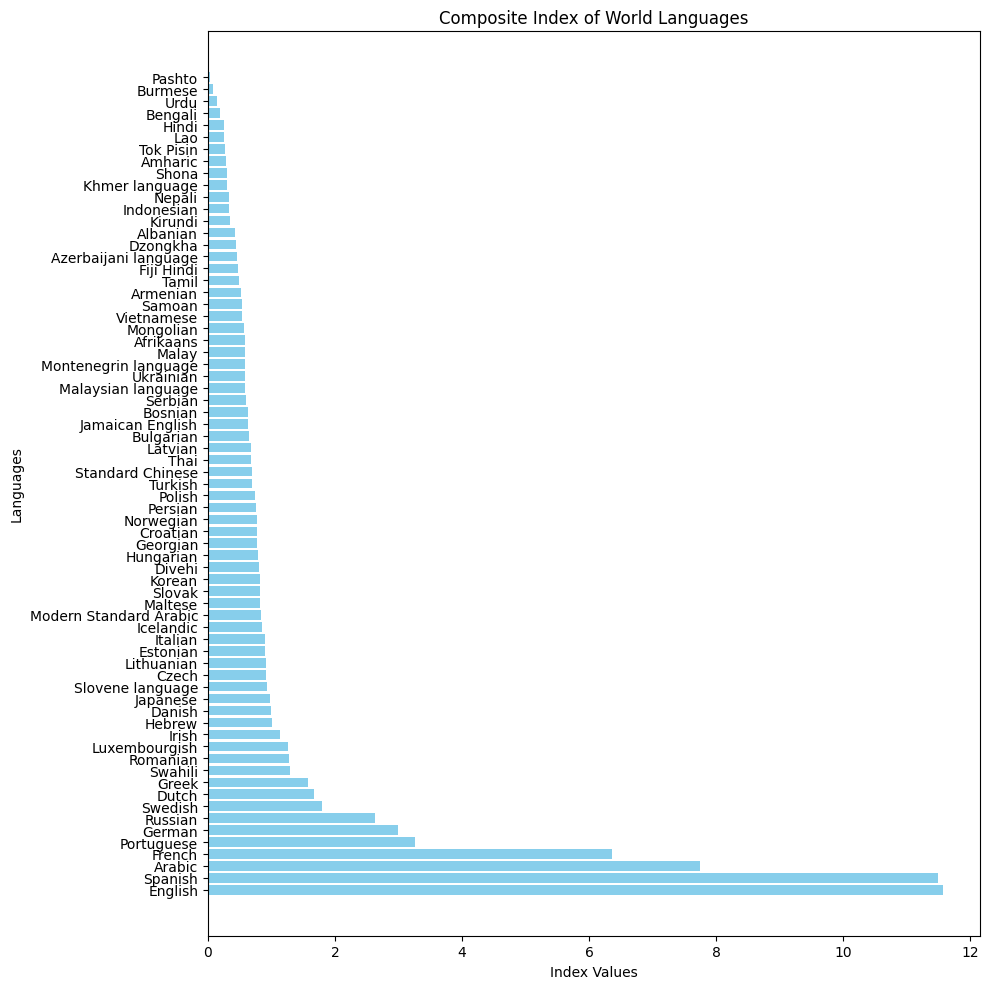

In [495]:

plt.figure(figsize=(10, 10))
plt.barh(language_df['Language'], language_df['Composite Indicator'], color='skyblue')
plt.xlabel('Index Values')
plt.ylabel('Languages')
plt.title('Composite Index of World Languages')
plt.tight_layout()
plt.show()

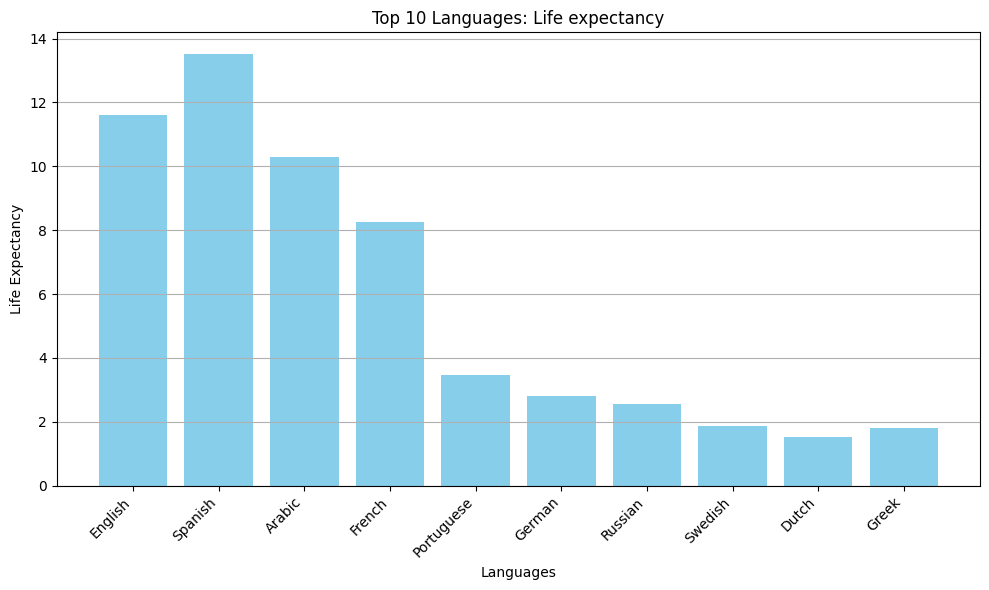

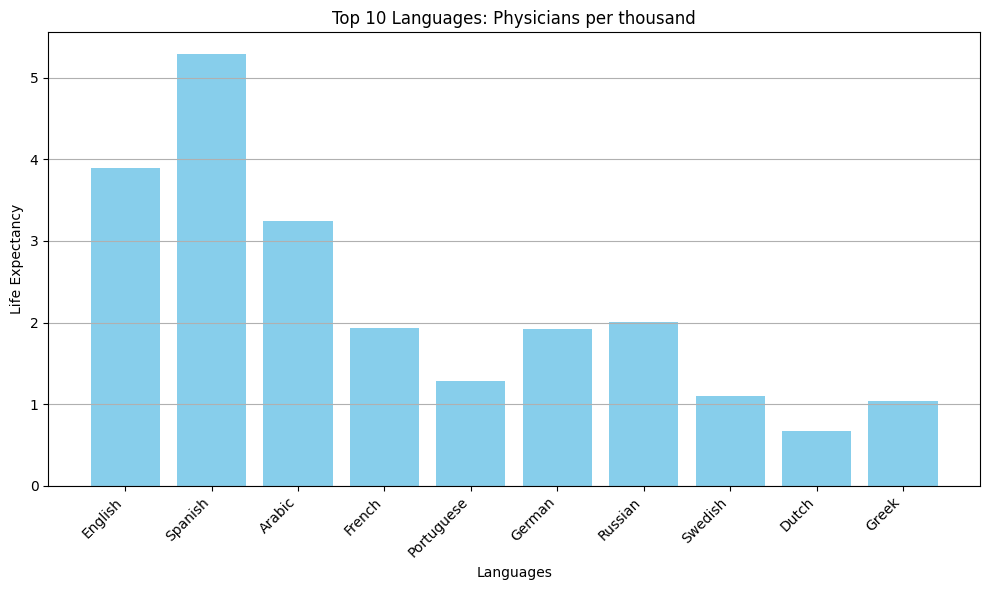

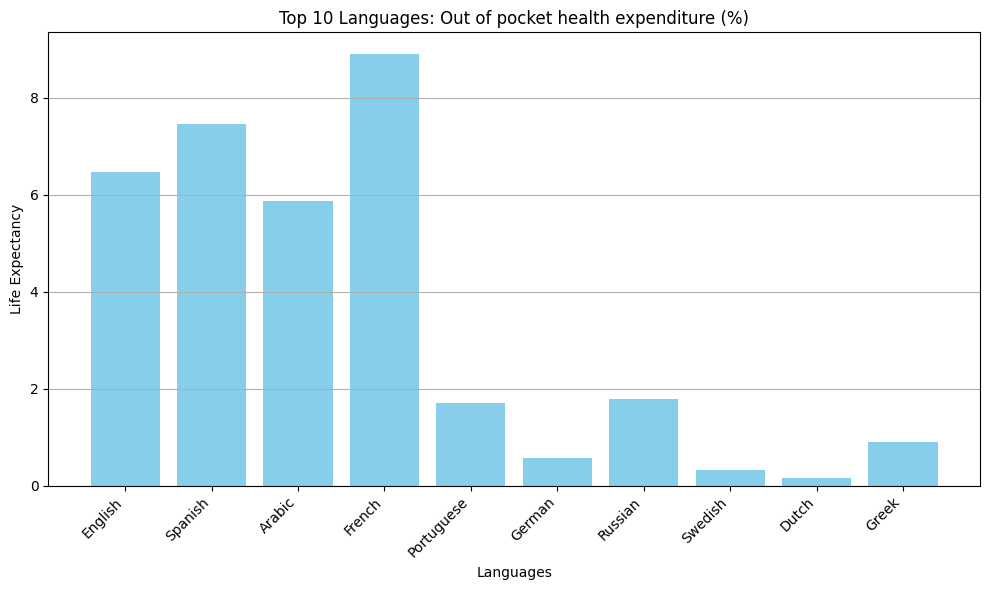

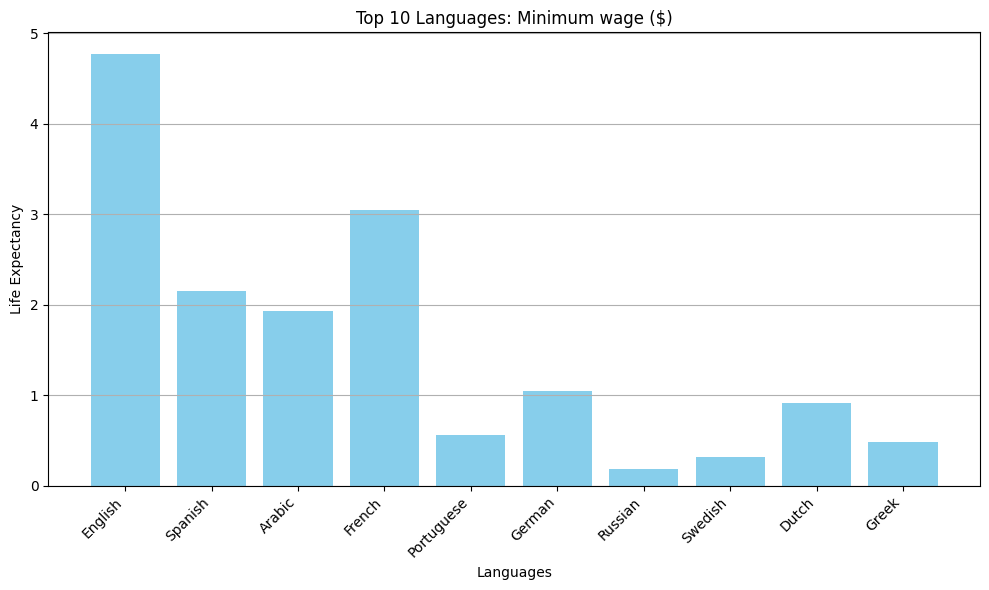

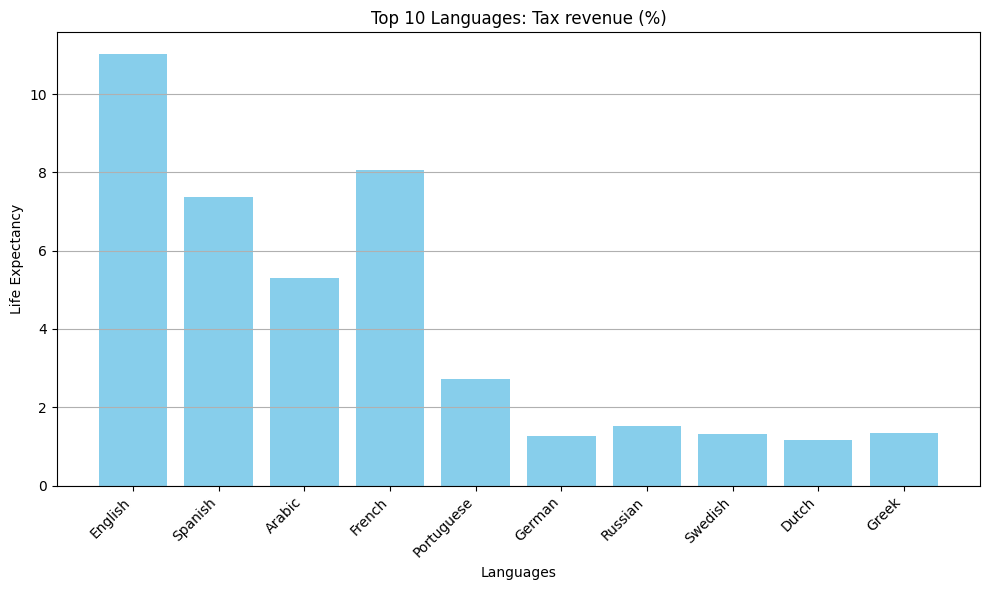

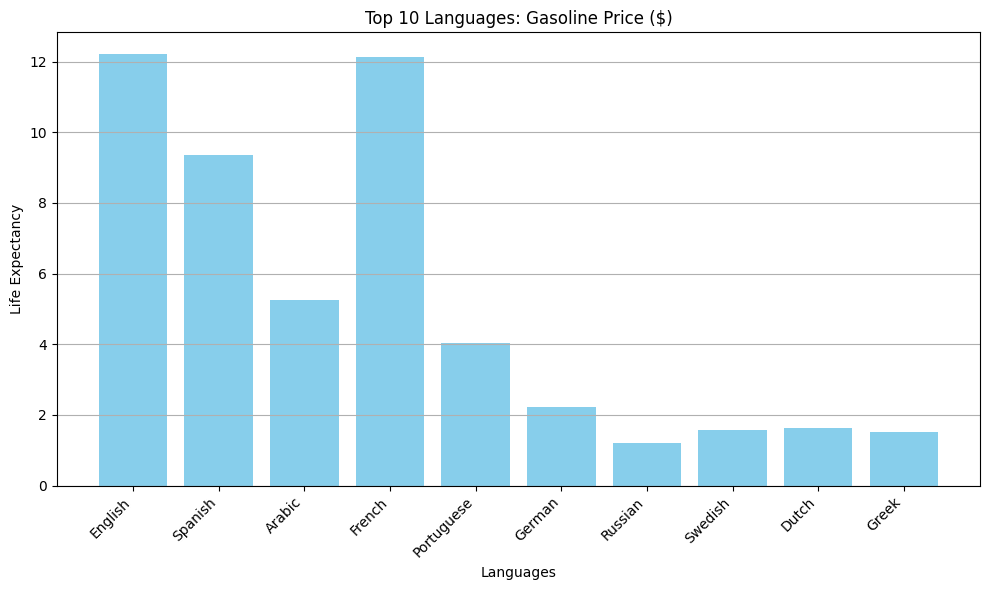

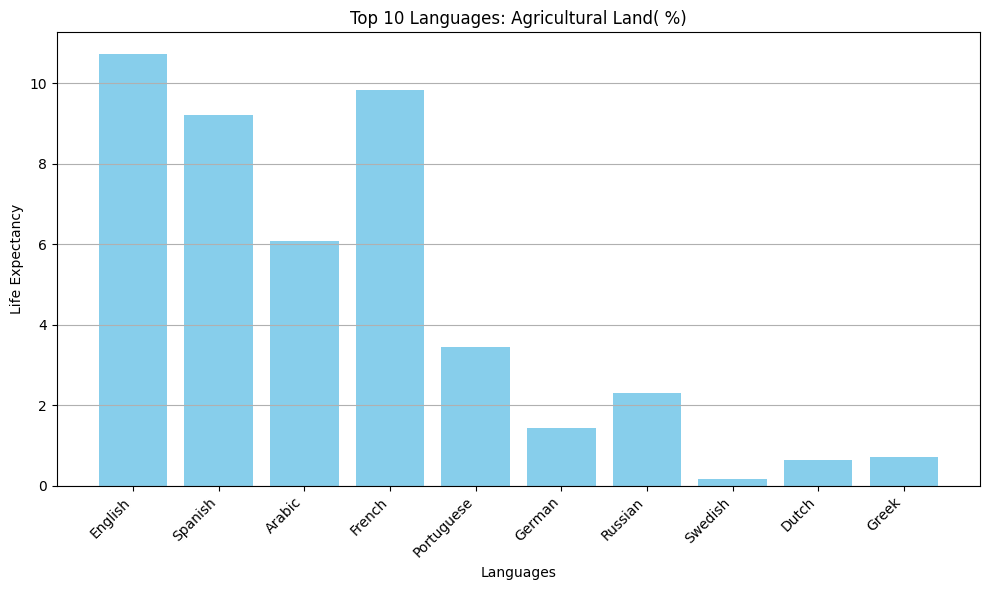

In [496]:
import matplotlib.pyplot as plt

top_10_languages = merged_df.nsmallest(10, 'Rank')

columns = [
    'Life expectancy',
    'Physicians per thousand',
    'Out of pocket health expenditure (%)',
    'Minimum wage ($)',
    'Tax revenue (%)',
    'Gasoline Price ($)',
    'Agricultural Land( %)'
]

languages = top_10_languages['Language']

for col in columns:
    life_expectancies = top_10_languages[col]

    plt.figure(figsize=(10, 6))
    plt.bar(languages, life_expectancies, color='skyblue')
    plt.xlabel('Languages')
    plt.ylabel('Life Expectancy')
    plt.title(f'Top 10 Languages: {col}')
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y')

    plt.tight_layout()
    plt.show()
